# Introductory for credit risk analysis

<p style='text-align: justify;'> With the introduction of Basel II, banks are allowed to use their internally developed models for calculating regulatory capital. This is known as the Internal Ratings-Based (IRB) approach. Otherwise, the bank should calculate its regulatory capital based on the standardized approach which generally demands higher capital requirements. The purpose of the development of rating models is to identify and combine those factors that differentiate between facilities the best in terms of riskiness. Three main elements of loss equation terms used to describe the risk of facilities are the probability of default (PD), loss given default (LGD), and exposure at default (EAD). </p>


<p style='text-align: justify;'> By its definition, PD, is a quantitative measure of how likely an applicant for credit is to default within a certain period. Numerous models are available to pursue however, currently, the most commonly used one is the logistic regression (LR) approach. Very recently, survival analysis has been introduced into three main stages of credit risk modeling (PD, LGD, and EAD). This collection of statistical methods tries to model the time to default and has advantages compared to other credit risk analysis methods. The goal of the current project is to implement estimation of the PD which is to pursue the survival analysis as a theoretical framework.</p>


<p style='text-align: justify;'> All PD models share the same basic ideas. The first step is to classify a sample of previous customers based on historical repayment performance, into either good or bad. The next step is to link the characteristics (factors) of these clients to the default status of the client. Many different techniques are available for building such systems, for example, discriminant analysis, expert systems, and logistic regression. Currently, logistic regression is an industry-standard.</p>



<p style='text-align: justify;'> Lately, the concept of survival analysis has been introduced into credit risk modeling. Immediately raised question would be, what is the survival analysis? Survival analysis is the area of statistics that deals with the analysis of lifetime data. The variable of interest is the time to the occurrence of an event. It is worth mentioning that, it is commonly used in medical drug studies and reliability studies in engineering. As an example, in medical studies, the effect of a drug on the lifetime of a patient with a certain disease can be studied. The time to event in this case is defined as the time till death. </p>

# Credit Scorecard Analysis process 

<p style='text-align: justify;'> Generally, a typical PD (more generally scorecard) modeling framework consists of five major steps and is presented below figure. With the development of the Logistic regression framework, the focus is on the two phases: scorecard development and calibration. </p>

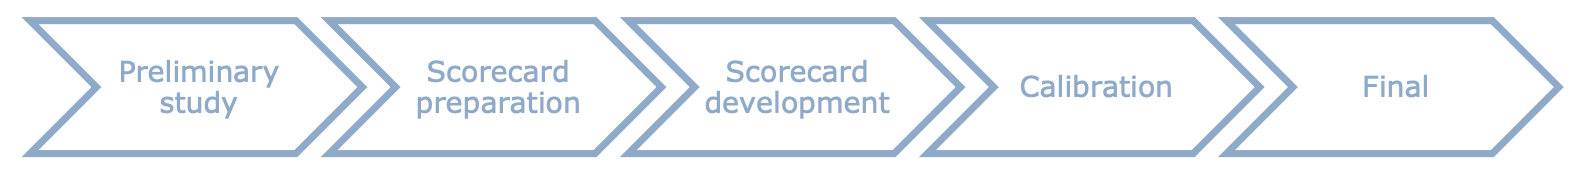

<p style='text-align: justify;'> As is shown in the above graph, any typical probability of default modeling consists of five steps. In the next paragraphs, I will try to briefly explain what they do. </p>

<p style='text-align: justify;'> The initial set-up or preliminary study provides an overview of the development of the model. It names all people in the development team, the objective of the model and regulatory requirements, and finally the methodology. </p>

<p style='text-align: justify;'> In the scorecard preparation phase it is all about factors. Factors are explanatory variables known as covariates. This stage identifies, collects, links, and cleans these factors to make them ready for regression. </p>


<p style='text-align: justify;'> The third stage, scorecard development, will be redeveloped and consists of single-factor analysis (SFA) and multifactor analysis (MFA). The SFA examines the standalone discriminatory power and predictive power of the individual factors. To reduce the number of factors in the multifactor analysis only the best predictive factors are selected. Next, the factors are transformed into interpretable scores, i.e., between 0-10. The SFA is followed by the MFA, this stage combines the best standalone predictive factors into a model. Correlation between factors is taken into account to create a stable and robust final model. The output of the MFA is not a credit rating but a creditworthiness score. The higher the score, the lower the expected PD of the facilities. </p>

## <p style='text-align: justify;'> Single factor analysis </p>

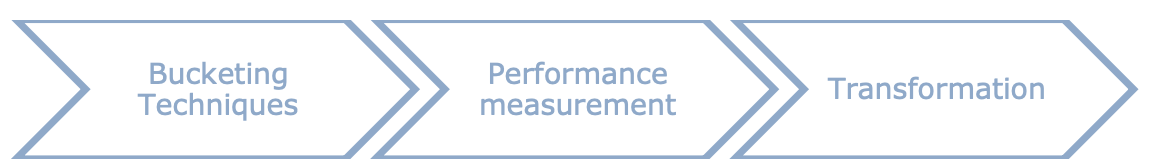


<p style='text-align: justify;'> The first main stage in the model development, as well as implementation, is the single-factor analysis. In this stage, the factors that have predictive power for defaults are selected and transformed. For example, a defaulted counterparty before the default is likely to have factor scores that are significantly lower or higher than other comparable counterparties that did not default. The main task is to find the factors for which either high or low values correspond to high PDs. </p>



<p style='text-align: justify;'> The goal of the SFA is twofold: </p>

* <p style='text-align: justify;'> The selection of factors for further modelling, which is done by analysing the standalone discriminatory powers of the factors and expert opinion. </p>

* <p style='text-align: justify;'> The transformation of the factor values into interpretable scores, i.e. between 0-10. This transformation is generally based on the relation between the factors and the goal variable. </p>


#### Bucketing techniques

<p style='text-align: justify;'> Before assessing the performance of the individual factors, it should be considered to bucket the factors. Bucketing of factors has certain advantages, firstly the relation between creditworthiness and factor values can be assessed more easily by experts. Secondly some performance tests require buckets such as information value and weight of evidence. Lastly is it helpful for the transformation that needs to be performed.</p>


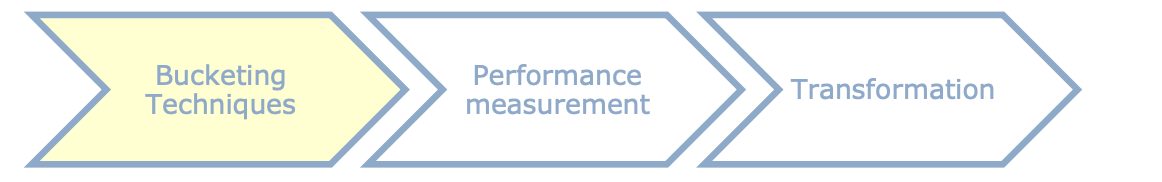


<p style='text-align: justify;'> Basically there are three types of bucketing approaches:</p>

<p style='text-align: justify;'> Statistical significance or statistical optimal bucketing, this is the preferred approach within RI and discriminates on statistically significant difference in the creditworthiness between two
buckets. This procedure is further explained below.</p>


<p style='text-align: justify;'> Equally sized buckets, this creates buckets with similar size. For example a factor with a score from 0-100 the buckets can be made for scores from 0-20, 20-40 and so on. (see Figure 40)</p>


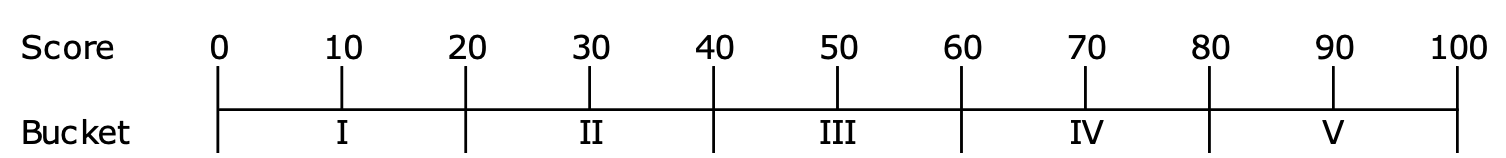

<p style='text-align: justify;'> Equally distributed, this approach creates buckets with the same number of facilities in each bucket. (see Figure 41)</p>

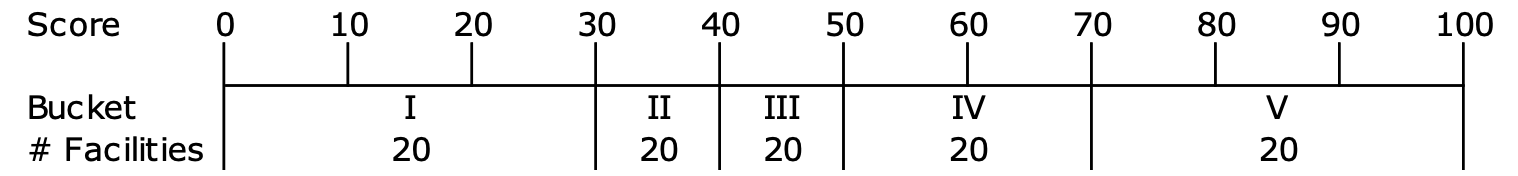


<p style='text-align: justify;'> The preferred approach for bucketing is the statistical optimal bucketing approach. A bucket contains those observations that have factor values between the corresponding bucket boundaries. This approach starts with a large number of buckets and calculates the average default frequency in each bucket. Because buckets should discriminate neighbouring buckets on basis of default frequency, a t- test is used to determine if two samples have the same average default frequency. If they don’t have significantly different average default frequency the buckets are merged. The tests will be applied with a specified significance level (95%). This procedure will continue until all tests are significant or when there is only one bucket left.</p>


<p style='text-align: justify;'> After the bucketing process a histogram is generated showing the number of observations per bucket. Next the average default frequency per bucket is calculated and plotted in the middle of the bucket. Next a trend line is fitted on the default frequency per bucket. This type of bucketing can detect positive and negative linear trends and U-shaped trends. In U-shaped trends both very high and very low factor values correspond to worse (or better) creditworthiness.</p>

#### Performance measurement
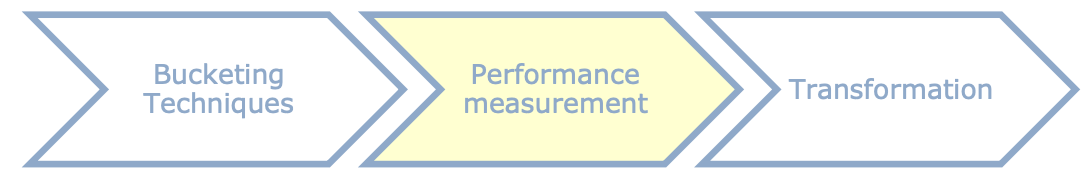

<p style='text-align: justify;'> An important part of the SFA is the measure of the predictive power of an individual factor. This measure is used in the selection and transformation of factors. Four measures of predictive power will be given: Power Statistic, Weight of Evidence (WoE), Information value and trend (Siddiqi, 2005).</p>


##### Weight of Evidence

<p style='text-align: justify;'> Another performance measure which requires bucketed factors is Weight of Evidence (WoE). (Herel, Hoek, $\&$ Vedder, Retail Modelling Development Guidelines, 2012) This measures the difference between the proportion of goods and bads within each factor category. It is a measure of how well each bucket of a particular risk factor separates good accounts from bad accounts. The formula is give by:</p>


$$ WoE_{j} = Ln(\frac{({N_{Gj} + 1/2})/({N_{G} +1})}{({N_{Bj} + 1/2})/({N_{B} + 1})})$$

Here $Ln$ stands for the natural logharithm.

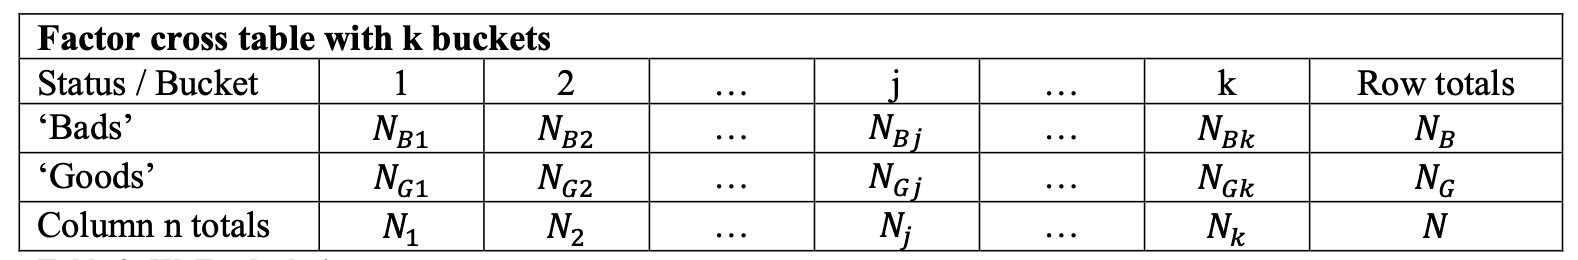

##### Transformation

<p style='text-align: justify;'> After the performance measurement the factors are transformed. This transformation of a factor brings the ratios into a standard interval from 0 to 10. The goal of a transformation is twofold:</p>

* <p style='text-align: justify;'> In order to be able to compare (the coefficients of) different ratios in the multifactor analysis.</p>

* <p style='text-align: justify;'> A transformation suppresses the impact of outliers in the development process and in daily use
of the model.</p>

<p style='text-align: justify;'> The transformation of factors can be completed on the based on creditworthiness or distribution of the factor. Within RI the preferred transformation is based on the creditworthiness and this approach is used in retail modelling. For corporate modelling transformation based on the distribution of the factor is used because transformation on the basis of creditworthiness is not available.</p>


##### Linear transformation

<p style='text-align: justify;'> Another transformation which is based on the credit worthiness is called linear transformation. First the factor should be put into buckets and next calculate the WoE value for each bucket. Next a linear transformation on the WoE value is used to transform the factor scores into the range of [0,10]. The highest WoE value is defined as 10 and the lowest WoE value as a 0.</p>


<p style='text-align: justify;'> An example is given in Table 10 where the factor is split into three buckets with each 30 observations. Next the distribution goods and bads are calculated from where the WoE value is calculated. The highest value is 91.63 and the observations in this bucket get the score 10. The lowest WoE value is - 69.31 and the observations in this bucket get the score 0. The other observations are linear interpolated. So the observations in bucket with WoE value of 0 get the score 4.3.</p>

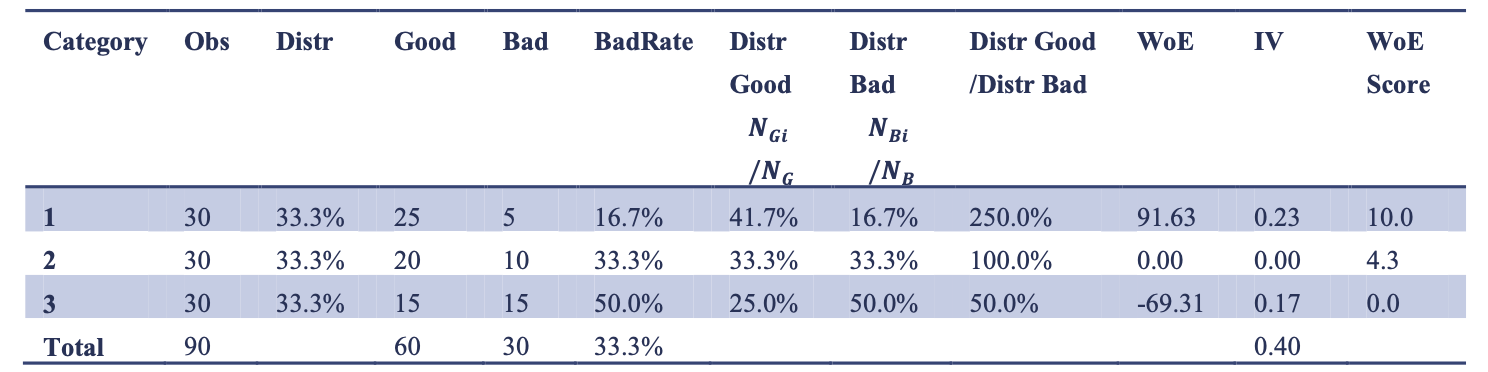

# Multi factor analysis
<p style='text-align: justify;'> After the singlefactor analysis, the multifactor analysis is started. The multifactor analysis determines how the individual risk drivers, identified in the SFA, is incorporated into the final model. The goal of the MFA is to come up with a final model based on the best combined explanatory factors, taking into account redundancy/dependence between the factors. Any typical multi-factor analysis used in the credit risk modelling composed of the folowwing main steps: </p>

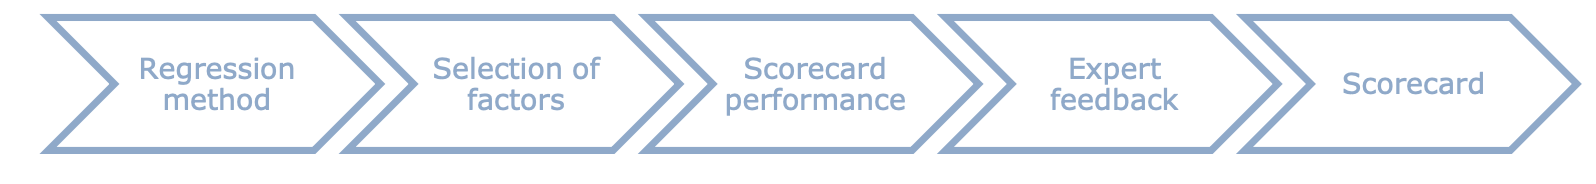

<p style='text-align: justify;'> The first step is to select a regression method for the multifactor analysis. Next step is to find the best set of predicting factors that have high predictive power using the regression method. The third step test the stability and robustness of the scorecard performance. Resulting in the final model. Next step is feedback from experts. This is discussed and implemented to end up in the last step with the actual model.</p>


##### Regression method

<p style='text-align: justify;'> The goal variable is either good(0) or bad(1). Because the goal variable is binary, logistic regression is used. (Siddiqi, 2005).</p>

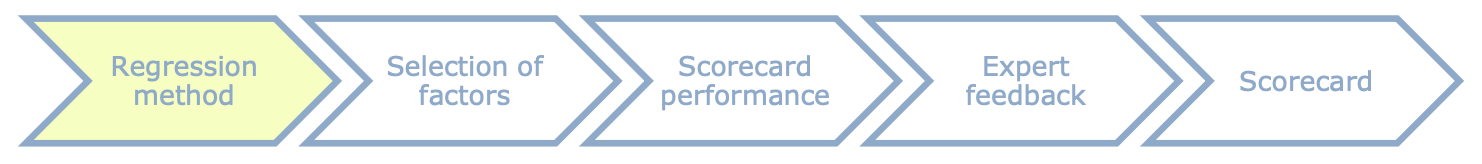


##### Selection of factors

<p style='text-align: justify;'> The goal variable is either good(0) or bad(1). Because the goal variable is binary, logistic regression is used. (Siddiqi, 2005). The selection of factors section consists of two steps: the stepwise multifactor analysis and sampling. Stepwise multifactor analysis finds the best set of predicting variables given a dataset. Next a sampling is used to generate subsets of the total dataset and generate a robust model.</p>

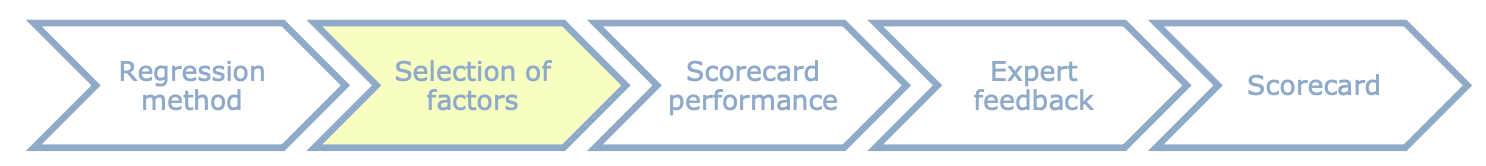


##### Stepwise multifactor analysis

<p style='text-align: justify;'> To come up with the best set of predicting factors, stepwise multifactor analysis is used. This is a heuristic approach. A sampling method is used in order to establish a robust model and furthermore the correlation between factors is checked. The final model should satisfy three requirements:</p>


* <p style='text-align: justify;'> Good overall explanatory power </p>


* <p style='text-align: justify;'>Limited number of factors </p>


* <p style='text-align: justify;'> Each factor in the model has significant predictive power </p>


<p style='text-align: justify;'> The stepwise multifactor analysis consists of the following steps:</p>

* <p style='text-align: justify;'> First a standalone logistic regression of all the factors on the goal variable is done. </p>
* <p style='text-align: justify;'> First a standalone logistic regression of all the factors on the goal variable is done.</p>

* <p style='text-align: justify;'> From the list select the factor with the highest F-statistic. This is a statistical test used to identify the model that best fits the population from which the data were sampled.</p>

* <p style='text-align: justify;'>Make a new regression with the selected factors and each individual remaining factor. </p>

* <p style='text-align: justify;'> Repeat step 2.</p>

* <p style='text-align: justify;'>If a factor has a p-value below threshold or becomes counterintuitive the factor is deleted. </p>
* <p style='text-align: justify;'> Select the set of factors with the highest F-statistic.</p>

* <p style='text-align: justify;'> Repeat step 4 to 7 until no factors are left.</p>

#### Sampling

<p style='text-align: justify;'> The dataset is divided into a randomly selected development sample and a holdout sample. Next the model is fitted on the development sample and tested on the independent holdout sample. Because the holdout sample is not used in the optimisation procedure this testing is very powerful. (Herel, Hoek, $\&$ Vedder, Retail Modelling Development Guidelines, 2012).</p>


<p style='text-align: justify;'> A typical ratio between the development and holdout sample is 80%/20%. Because the holdout sample is small it occasionally happens that the holdout sample is very biased. If the model, estimated on the development sample is tested on this holdout sample it would result in a incorrect result about the real performance of the model. In order to cover for this the process is 100 times repeated. With this technique the model is tested regarding:</p>


<p style='text-align: justify;'> The dataset is divided into a randomly selected development sample and a holdout sample. Next the model is fitted on the development sample and tested on the independent holdout sample. Because the holdout sample is not used in the optimisation procedure this testing is very powerful. (Herel, Hoek, $\&$ Vedder, Retail Modelling Development Guidelines, 2012).</p>


* <p style='text-align: justify;'> Selection of factors; factors that are in for example 80% of the models selected, are the most important factors. Factors that are selected in 30-80% might also contain significant information and can be discussed with experts.</p>


* <p style='text-align: justify;'> The weight; weight will vary for each development sample, since the estimation depends on the data. Asses the stability of weights. If they vary too much it can be considered to remove them from the sample.</p>



* <p style='text-align: justify;'> Performance; The models that are estimated on the development samples can immediately be tested on the corresponding holdout samples. In this way there is not one performance number (determined on only one holdout sample), but there are many more. This provides better insight in the average performance as well as the stability of the performance.</p>


* <p style='text-align: justify;'> Performance; The models that are estimated on the development samples can immediately be tested on the corresponding holdout samples. In this way there is not one performance number (determined on only one holdout sample), but there are many more. This provides better insight in the average performance as well as the stability of the performance.</p>


<p style='text-align: justify;'>  The final selection of factors is done in two steps: selection of factors and model performance and stability. In the first step the model is fitted 100 times and the most selected factors are selected. In the second step the model is fitted 100 times to the selected factors and the weight estimates are checked on stability.</p>


<p style='text-align: justify;'> 1. Selection of factors: </p>

* <p style='text-align: justify;'> Produce a development sample and a holdout sample, generally 80/20%, of randomly selected records of the complete dataset. </p>

* <p style='text-align: justify;'> Apply stepwise regression on the development sample. </p>

* <p style='text-align: justify;'> Apply step 1-2 100 times and identify which factors have been incorporated in the 100 model estimates, plus the frequencies. </p>

* <p style='text-align: justify;'> The final factor selection is based on a combination of this analysis and expert feedback. </p>

<p style='text-align: justify;'> 2. Model performance and stability </p>

* <p style='text-align: justify;'> Produce a development sample and a holdout sample, generally 80/20%, of randomly selected records of the complete dataset. </p>

* <p style='text-align: justify;'> Apply stepwise regression on the development sample. </p>

* <p style='text-align: justify;'> Apply step 1-2 100 times and store the weight and performance of the model.</p>


* <p style='text-align: justify;'> Asses the average weight and minimum, maximum and standard deviation. </p>

* <p style='text-align: justify;'> Assess the average performance and for example the standard deviations, minima and maxima of the performance.. </p>

<p style='text-align: justify;'> Finally the factors are tested for correlation since too high correlation can lead to multicollinearity. This means that the one factor can be linearly predicted from the other, resulting in unstable weights. Another result of correlation between factors might be the selection of redundant factors. This stage eliminates these factors. </p>

#### Scorecard performance

<p style='text-align: justify;'> After the selection of factors is completed and the model performs well on the holdout samples it should be tested whether it also performs well on other subsamples. This stage is called the scorecard performance.</p>

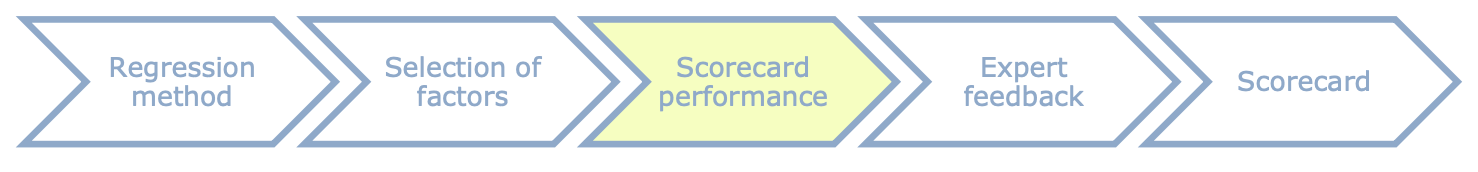

<p style='text-align: justify;'> After the model is completed and performs well on the holdout samples it should be tested whether it also performs well on other subsamples. The list of subsamples is created with experts. Some examples of subsamples are:</p>


* <p style='text-align: justify;'>New facilities </p>

* <p style='text-align: justify;'>Different product groups </p>

* <p style='text-align: justify;'>Application observations </p>


<p style='text-align: justify;'> Another way of testing the performance is to develop a model on a subgroup and test whether is model performs much better on this subgroup compared to the model developed on the whole portfolio. In case the model is significantly better, it confirms that one model for different product groups is acceptable.</p>


##### Expert feedback

<p style='text-align: justify;'> If experts strongly disagree with the statistical model, the weights can be changed accordingly to the experts and the power statistic is compared. If the difference between the two models is not significant the model with the new expert weights is selected, otherwise the results should be discussed with the experts. The scorecard is completed when both, the modellers and the experts, are satisfied with the model.</p>


##### Calibration

<p style='text-align: justify;'> If experts strongly disagree with the statistical model, the weights can be changed accordingly to the experts and the power statistic is compared. If the difference between the two models is not significant the model with the new expert weights is selected, otherwise the results should be discussed with the experts. The scorecard is completed when both, the modellers and the experts, are satisfied with the model.</p>


<p style='text-align: justify;'> After the SFA and MFA are finished a score for each loan in the portfolio can be calculated. The higher the score, the lower the expected PD of the facilities. Next step is to bucket the scores based on homogeneous scores and assign PD values to each individual bucket. This bucketing uses the same technique as explained in Appendix B 1.1 Bucketing techniques.</p>

# Priliminary study

## Logistic regression
<p style='text-align: justify;'> Current PD estimations are based upon logistic regression. This methodology consists of taking a sample of previous customers and classify them into good or bad (good-bad modelling). The classification is based on the repayment performance over a given period. The goal of this regression modelling is to estimate credit risk and to extract variables that are important in credit risk prediction.</p>

<p style='text-align: justify;'> The observations in the portfolio are marked as good or bad based on certain criteria. These criteria are mainly based on payment behaviour. For example, a typical criterion for a bad observation is a payment delay of more than 90 days. A good observation is then an observation for which payments have been received on time. Finally, observations for which it cannot be determined whether they are good or bad, are marked as undefined and left out of the modelling.</p>


<p style='text-align: justify;'> The logistic regression is different from regular regression because dependent variable is binary. A measure of the probability of the outcome is given by the odds of occurrence an event. If the probability of defaulting of a facility is given by $P$, then the probability of a facility not defaulting is given by $1-P$. The odds of default are given by:</p>

$$odd of default = \frac{p}{1-p}$$

<p style='text-align: justify;'> The probability that a facility ends up in default is modelled by the logistic model and is given by:</p>

$$P(default|x_{i}) = \frac{exp(\sum_{i = 0} \beta_{i}x{i})}{1 + exp(\sum_{i = 0} \beta_{i}x{i})} = \frac{1}{1 + exp(-\sum_{i = 0} \beta_{i}x{i})}$$



<p style='text-align: justify;'> The shape of the logistic function from Equation 2 is given in Figure 6. The shape suggests that the probability for low predictor values x is low, and then there is some threshold value of the predictor at which the estimated probability of event begins to increase. For high predictor values the probability is high.</p>


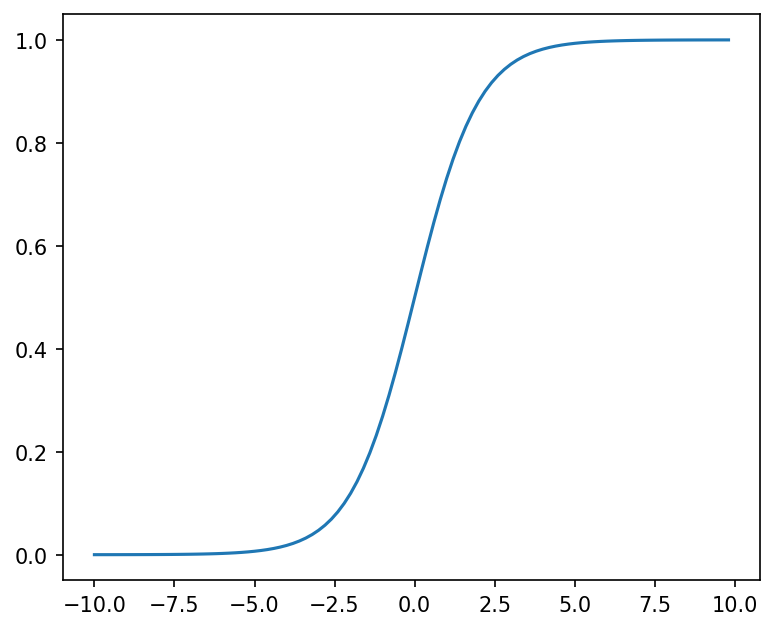

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

f, (ax_hist) = plt.subplots(1, figsize = (6, 5), dpi = 150)
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

<p style='text-align: justify;'> The popularity of the logistic model is mainly caused by this shape and the fact the function ranges between 0 and 1. The model is used to describe the probability of default of a facility, which is always between 0 and 1.</p>


<p style='text-align: justify;'> In order to estimate the PD for a fixed time period such as in the logistic regression, the data must be prepared for one year observations. This consists of taking an observation and observe if the facility ended up good or bad.</p>


<p style='text-align: justify;'> Some facilities leave the portfolio before the one year period expires, for example because the loan is sold. In below figure, Facility 1 and 2 are still in the portfolio after one year and can therefore be measured. Facility 3 is in default after 4 months and is therefore marked as bad. Facility 4 and 5 are still marked as good when they leave (for example loan is sold) the portfolio after 4 and 10 months. If the time between the first observation and the facility leaving the portfolio is between 1-6 months the facility is classified as undefined. If the facility leaves between 7-12 months, the facility is classified as good. Because of this Facility 4 is left out of the modelling and facility 5 is marked as good..</p>


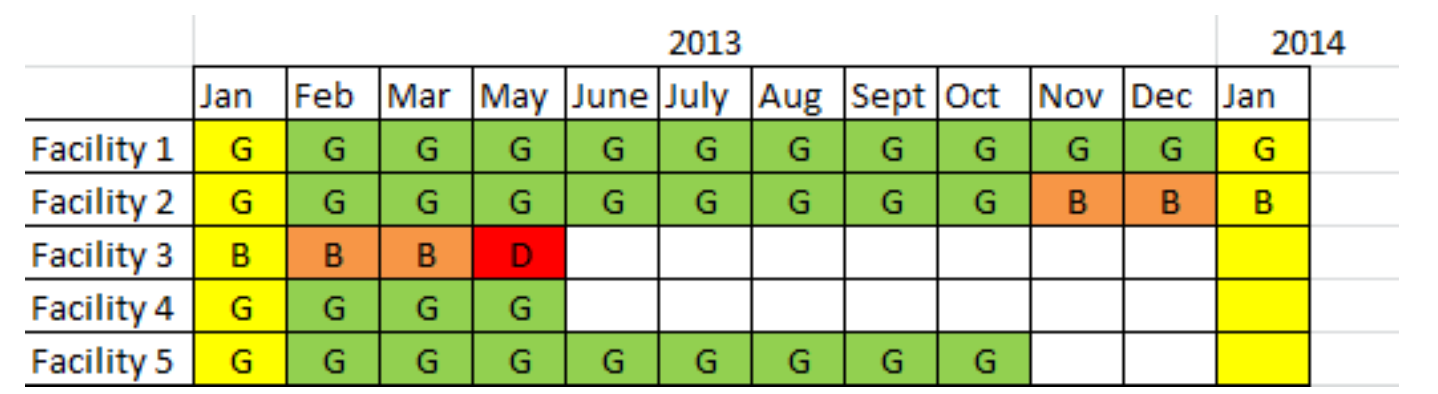

<p style='text-align: justify;'> This poses a problem with the logistic regression since the goal is to generate an unbiased model, as few facilities as possible should be removed from the dataset. Observations like facility 4 are removed from the dataset while they do contain information. They are not in the dataset for one year but with the values of Facility 4, the facility survived at least 4 months. Facility 5 is only in the portfolio for 10 months but in the regression this observation is assumed to be for the full year present.</p>

<p style='text-align: justify;'> Furthermore, logistic regression estimates the PD over a fixed time horizon (usually 1 year). For which the data must be prepared, a time consuming activity. A possible solution to these shortcomings might be the use of survival analysis. Survival analysis can incorporate incomplete observations as censored data. These are observations that for which the event is not observed during the study period, as will be further explained in Chapter 3. Survival analysis offers more advantages since it focuses on estimating the survival distribution, it can estimate the default risk over any future time horizon.</p>




# Scorecard preparation

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

# roc curve and auc
from imblearn.over_sampling  import SMOTE 
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.datasets        import make_classification

from optbinning import OptimalBinning   # pip install optbinning
from optbinning import MulticlassOptimalBinning

from IPython.core.display import display, HTML

import seaborn as sns; #sns.set(font_scale = 0.8)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

(CVXPY) Mar 22 01:29:40 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Version of ortools (9.2.9972) is too old. Expected >= 9.3.0.')
(CVXPY) Mar 22 01:29:40 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Version of ortools (9.2.9972) is too old. Expected >= 9.3.0.')


## Loading the dataset

In [4]:
# Loading the data set
data = pd.read_csv('dataMissing.csv' , delimiter = ',' )
data.drop('CustID',       axis = 1,      inplace = True)
display(pd.concat([data.head(),           data.tail()]))

,CustAge,TmAtAddress,ResStatus,EmpStatus,CustIncome,TmWBank,OtherCC,AMBalance,UtilRate,status
0,53.0,62,<undefined>,Unknown,50000,55,Yes,1055.93,0.22,0
1,61.0,22,Home Owner,Employed,52000,25,Yes,1161.58,0.24,0
2,47.0,30,Tenant,Employed,37000,61,No,877.23,0.29,0
3,NaN,75,Home Owner,Employed,53000,20,Yes,157.37,0.08,0
4,68.0,56,Home Owner,Employed,53000,14,Yes,561.84,0.11,0
1195,54.0,92,Home Owner,Unknown,41000,51,Yes,1230.98,0.35,0
1196,NaN,19,Tenant,Unknown,45000,4,Yes,239.28,0.13,1
1197,29.0,35,Home Owner,Employed,27000,47,Yes,16.18,0.01,1
1198,56.0,66,Tenant,Employed,38000,48,Yes,1009.24,0.47,0
1199,44.0,24,Tenant,Unknown,41000,16,Yes,1039.40,0.19,0


## Primary explotation of the dataset

In [5]:
# Extracting the dimension of the given dataset
print('The shape of a given dataset is ({m},{n})'.format(m = data['TmAtAddress'].count(),\
                                                                   n = len(data.columns)))

The shape of a given dataset is (1200,10)


In [6]:
# It will be useful if skeem through the type of a given features in dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustAge      1170 non-null   float64
 1   TmAtAddress  1200 non-null   int64  
 2   ResStatus    1200 non-null   object 
 3   EmpStatus    1200 non-null   object 
 4   CustIncome   1200 non-null   int64  
 5   TmWBank      1200 non-null   int64  
 6   OtherCC      1200 non-null   object 
 7   AMBalance    1200 non-null   float64
 8   UtilRate     1200 non-null   float64
 9   status       1200 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 93.9+ KB


## Seperating the categorical and numerical features

In [7]:
# Seperating the categorical and numeric features
categorical = data.select_dtypes(include = ['object'])
categorical['status'] = data['status'].values
categorical

,ResStatus,EmpStatus,OtherCC,status
0,<undefined>,Unknown,Yes,0
1,Home Owner,Employed,Yes,0
2,Tenant,Employed,No,0
3,Home Owner,Employed,Yes,0
4,Home Owner,Employed,Yes,0
...,...,...,...,...
1195,Home Owner,Unknown,Yes,0
1196,Tenant,Unknown,Yes,1
1197,Home Owner,Employed,Yes,1
1198,Tenant,Employed,Yes,0


In [8]:
for element in categorical.columns:
    print('\nThe list of unique elements of feature {elem} is: {list}'.format(elem = element, \
                                                                           list = data[element].unique()))


The list of unique elements of feature ResStatus is: ['<undefined>' 'Home Owner' 'Tenant' 'Other']

The list of unique elements of feature EmpStatus is: ['Unknown' 'Employed']

The list of unique elements of feature OtherCC is: ['Yes' 'No']

The list of unique elements of feature status is: [0 1]


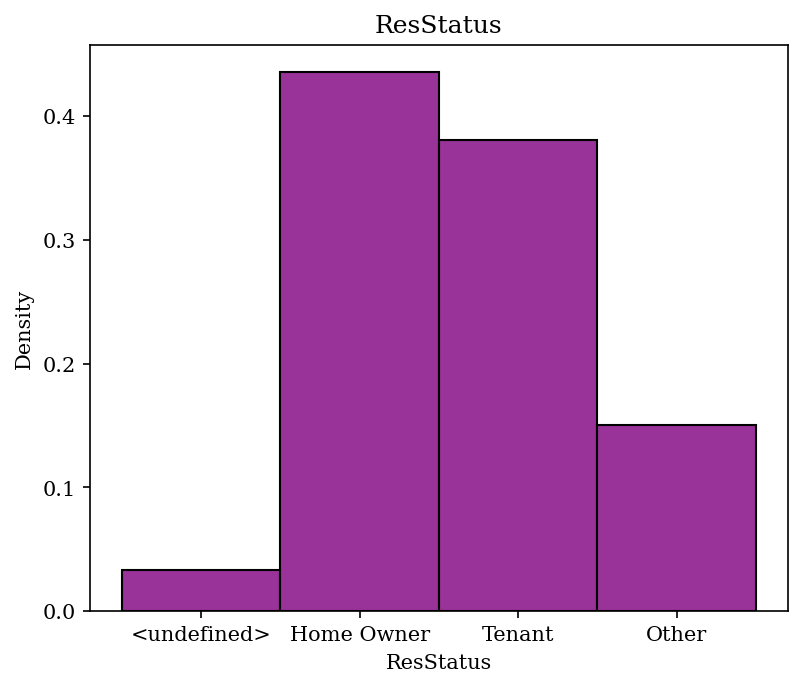

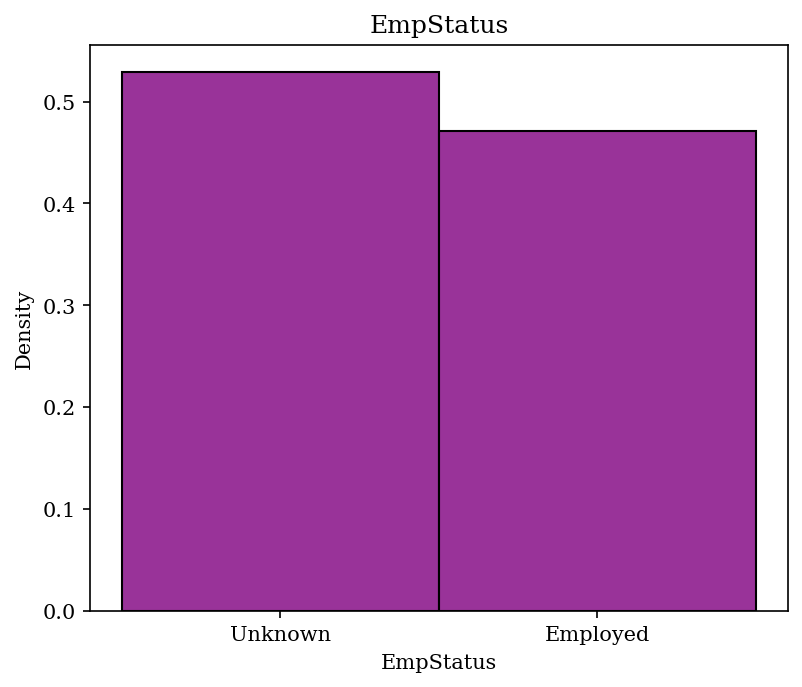

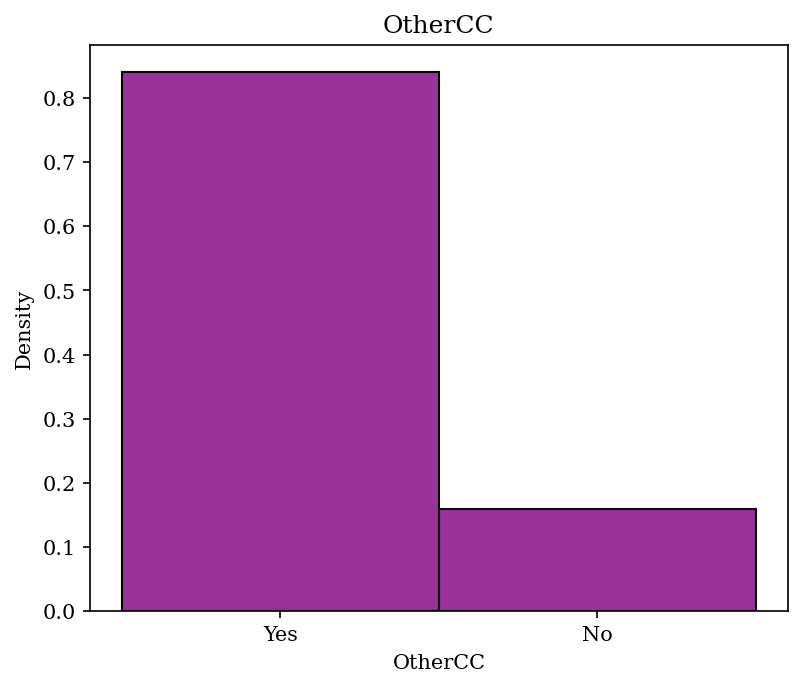

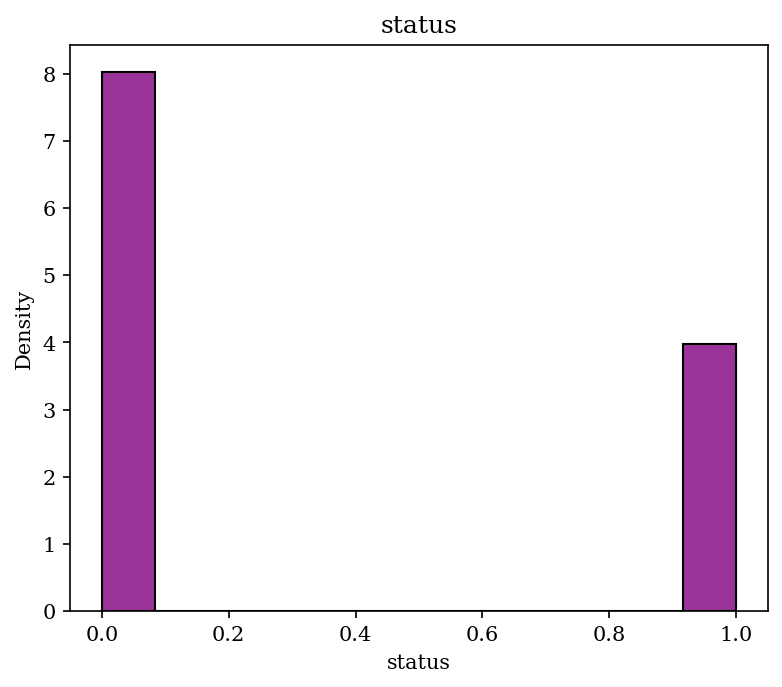

In [9]:
for elemt in categorical.columns:
    # In order to get the first quantitative and somehow quantitative intution regarding the
    # given features, it is useful to plot the histogram of the categorical features to see
    # the distribution of given features as a function of their elements.
    
    f, (ax_hist) = plt.subplots(1, figsize = (6, 5), dpi = 150)
 
    # assigning a graph to each ax
    sns.histplot(data = data, x = elemt, ax = ax_hist, color = 'purple', alpha = 0.8, stat="density")
 
    ax_hist.set(title = elemt )
    plt.show()

In [10]:
# Check the missing or inappropriate type of data for each given categorical feature
for element in categorical.columns:
    print(""" \nThe counts of each unique value for {elem} are \n {count}:""".format(elem = element, \
                                                         count = categorical[element].value_counts()))

 
The counts of each unique value for ResStatus are 
 Home Owner     523
Tenant         457
Other          180
<undefined>     40
Name: ResStatus, dtype: int64:
 
The counts of each unique value for EmpStatus are 
 Unknown     635
Employed    565
Name: EmpStatus, dtype: int64:
 
The counts of each unique value for OtherCC are 
 Yes    1009
No      191
Name: OtherCC, dtype: int64:
 
The counts of each unique value for status are 
 0    803
1    397
Name: status, dtype: int64:


In [11]:
# <undefined> is not in proper form to be used as string, so we will replace it with undefined
categorical['ResStatus'] = categorical['ResStatus'].replace('<undefined>', 'undefined' , regex = True)
categorical

,ResStatus,EmpStatus,OtherCC,status
0,undefined,Unknown,Yes,0
1,Home Owner,Employed,Yes,0
2,Tenant,Employed,No,0
3,Home Owner,Employed,Yes,0
4,Home Owner,Employed,Yes,0
...,...,...,...,...
1195,Home Owner,Unknown,Yes,0
1196,Tenant,Unknown,Yes,1
1197,Home Owner,Employed,Yes,1
1198,Tenant,Employed,Yes,0


In [12]:
# Collecting the numerical features into single dataset which their treatement is somehow 
# different than categorical
numerical = data.select_dtypes(include = ['int64', 'float64'])
numerical

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,53.0,62,50000,55,1055.93,0.22,0
1,61.0,22,52000,25,1161.58,0.24,0
2,47.0,30,37000,61,877.23,0.29,0
3,NaN,75,53000,20,157.37,0.08,0
4,68.0,56,53000,14,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,54.0,92,41000,51,1230.98,0.35,0
1196,NaN,19,45000,4,239.28,0.13,1
1197,29.0,35,27000,47,16.18,0.01,1
1198,56.0,66,38000,48,1009.24,0.47,0


In [13]:
# Imputing the CustAge with the mean value
numerical["CustAge"].fillna(numerical["CustAge"].mean(), inplace = True)

In [14]:
# One-shot basic statistic
numerical.describe()

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,45.109402,41.930833,39317.500000,34.243333,803.111483,0.220642,0.330833
std,9.684170,29.902807,8268.938255,25.189506,587.587261,0.258206,0.470709
min,21.000000,2.000000,18000.000000,2.000000,0.210000,0.000000,0.000000
25%,38.000000,19.000000,34000.000000,14.000000,337.492500,0.050000,0.000000
50%,45.000000,36.000000,39000.000000,28.000000,711.685000,0.130000,0.000000
75%,52.000000,58.000000,45000.000000,49.000000,1137.312500,0.310000,1.000000
max,74.000000,207.000000,62000.000000,128.000000,3812.000000,1.970000,1.000000


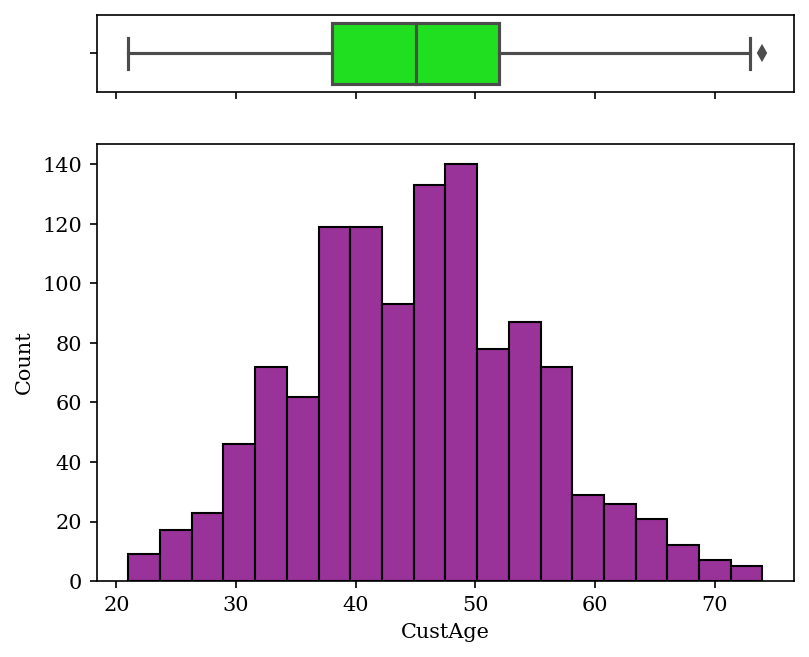

Basic statistic is
count    1170.000000
mean       45.109402
std         9.807645
min        21.000000
25%        38.000000
50%        45.000000
75%        52.000000
max        74.000000
Name: CustAge, dtype: float64






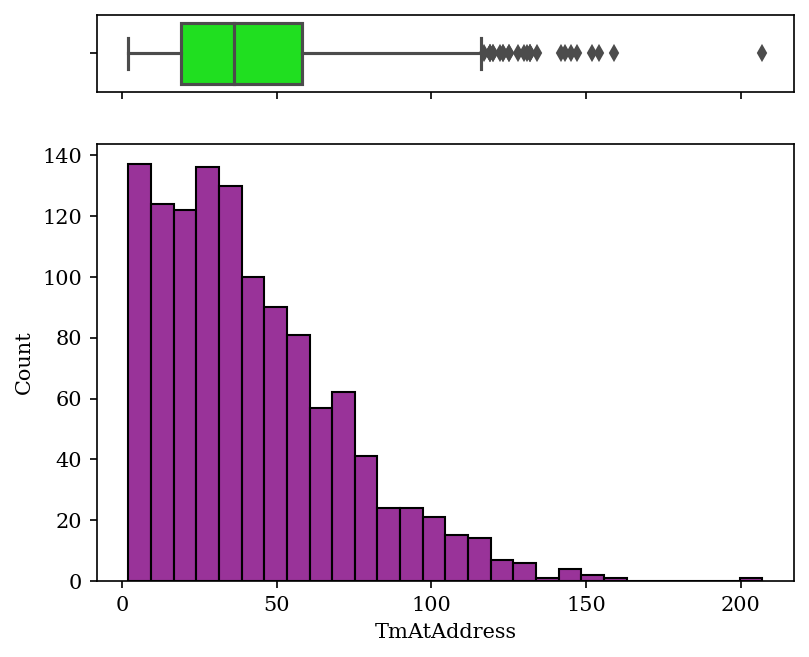

Basic statistic is
count    1200.000000
mean       41.930833
std        29.902807
min         2.000000
25%        19.000000
50%        36.000000
75%        58.000000
max       207.000000
Name: TmAtAddress, dtype: float64






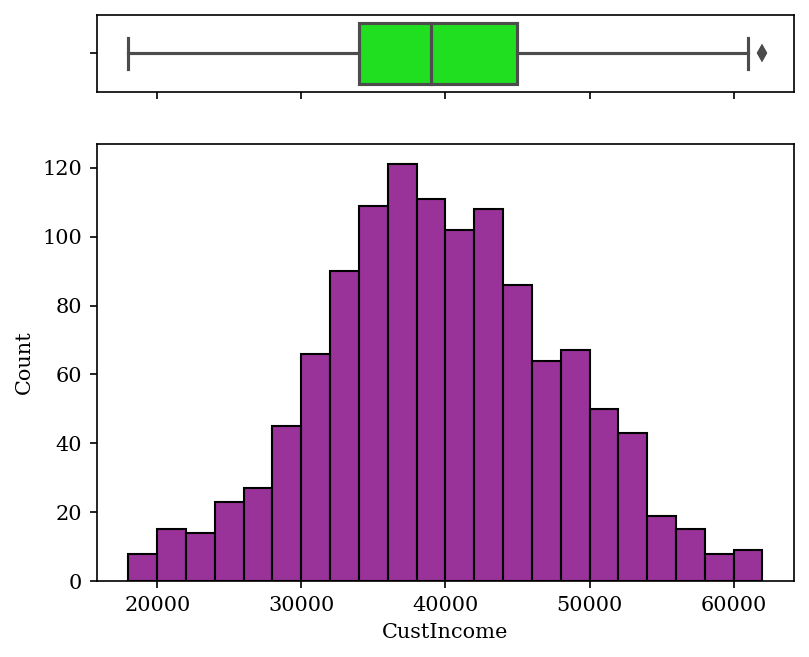

Basic statistic is
count     1200.000000
mean     39317.500000
std       8268.938255
min      18000.000000
25%      34000.000000
50%      39000.000000
75%      45000.000000
max      62000.000000
Name: CustIncome, dtype: float64






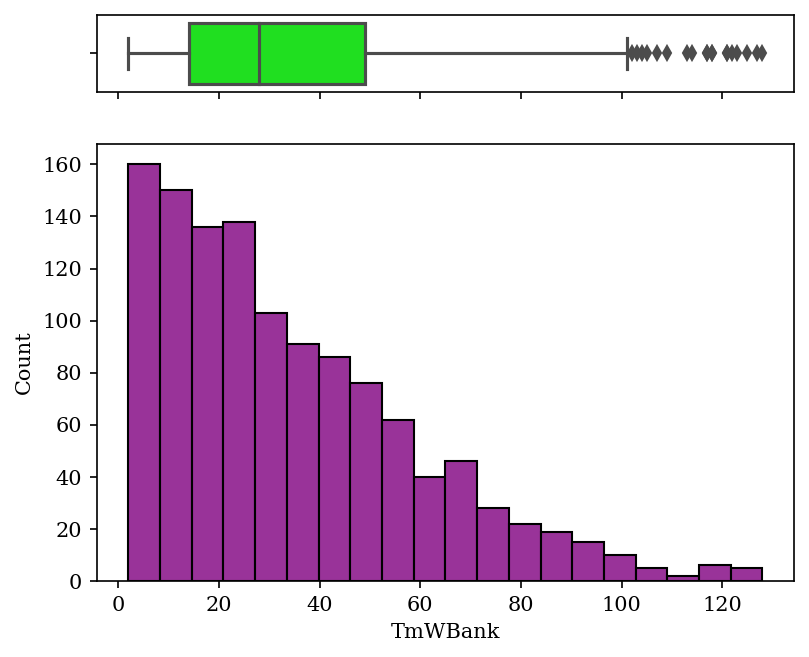

Basic statistic is
count    1200.000000
mean       34.243333
std        25.189506
min         2.000000
25%        14.000000
50%        28.000000
75%        49.000000
max       128.000000
Name: TmWBank, dtype: float64






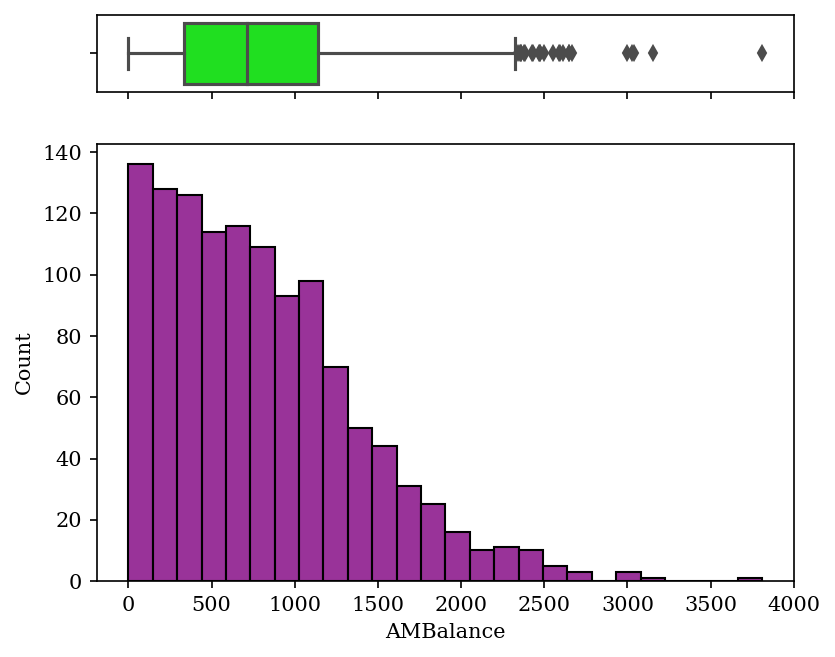

Basic statistic is
count    1200.000000
mean      803.111483
std       587.587261
min         0.210000
25%       337.492500
50%       711.685000
75%      1137.312500
max      3812.000000
Name: AMBalance, dtype: float64






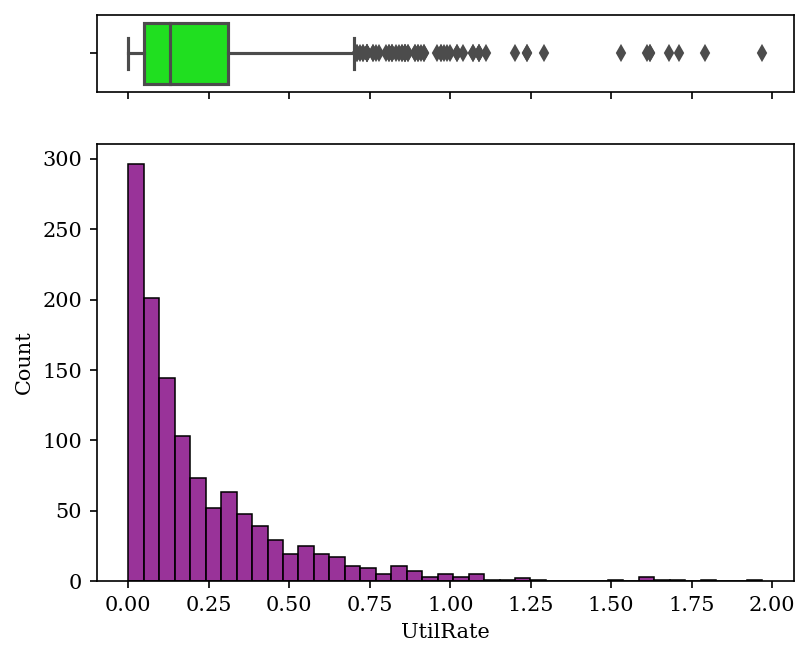

Basic statistic is
count    1200.000000
mean        0.220642
std         0.258206
min         0.000000
25%         0.050000
50%         0.130000
75%         0.310000
max         1.970000
Name: UtilRate, dtype: float64






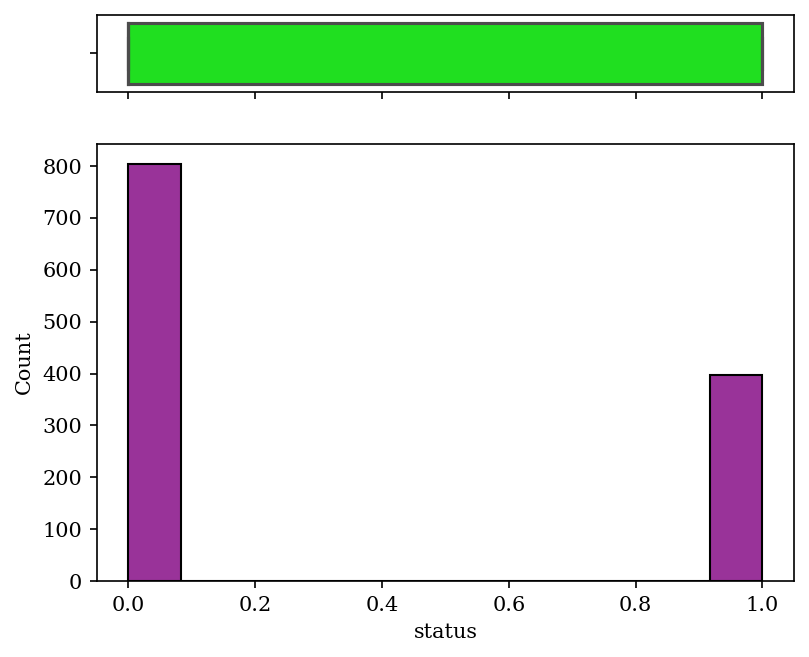

Basic statistic is
count    1200.000000
mean        0.330833
std         0.470709
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: status, dtype: float64




In [15]:
for elemt in numerical.columns:
    # For the case of the numerical features, it would be instructive if we combine the
    # histogram with box plot. In this sesction, we will plot the combined histogram and
    # box-plot for each of given numerical features.
    
    print('\n')
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, \
                       gridspec_kw={"height_ratios": (.15, .85)}, figsize = (6, 5), dpi = 150)
 
    # assigning a graph to each ax
    sns.boxplot(data[elemt], ax = ax_box , color = 'lime', )
    sns.histplot(data = data, x = elemt, ax = ax_hist, color = 'purple', alpha = 0.8)
 
    # Remove x axis name for the boxplot
    ax_box.set(xlabel = '')
    plt.show()
    print('Basic statistic is\n{}'.format(data[elemt].describe()))
    print('\n')

# Scorecard development

## Single factor analysis

### Categorical features treatement 

In [16]:
# function to calculate woe of categorical features
def woe_categorical(df, cat_feature, good_bad_df, label_angel):
    fig , ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = ((15,10)))
    ax2 = ax1.twinx()
    #print([100]*len(df[cat_feature].unique().tolist()))
    #print(df[cat_feature].unique().tolist())
    sns.barplot(ax = ax1, x = df[cat_feature].unique().tolist(), y = [100]*len(df[cat_feature].unique().tolist()),\
                               color = 'blue', alpha = 0.3)
    sns.barplot(ax = ax1, x =  df[cat_feature].unique().tolist(),\
                y = (1- df.groupby(cat_feature)["status"].sum()/df.groupby(cat_feature)["status"].count())*100,\
                color = 'red', alpha = 0.3)
     
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    sns.lineplot(ax = ax2, x = np.array(df.iloc[:, 0].apply(str)), y = df['WoE'], markers = 'o', \
                linewidth = 3, markersize = 14 )
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    return df

In [17]:
def WoEData(data, feature_name, unscaled_WoE):
    m, n = data.shape
    for element in unscaled_WoE[feature_name].unique().tolist():
        for i in range(m):
            if (data[feature_name][i] == element):
                data[feature_name][i] = unscaled_WoE['WoE'][unscaled_WoE[unscaled_WoE[feature_name]\
                                                                        == element].index.values[0]]
    return data

In [18]:
def WoEData_numerical(data, feature_name, unscaled_WoE, var_name):
    m, n = data.shape
    for element in data[feature_name].unique().tolist():
        for i in range(m):
            #print(i, element, data[feature_name][i],)
            if (data[feature_name][i] == element):
                data[feature_name][i] = unscaled_WoE['WoE'][unscaled_WoE[unscaled_WoE[var_name]\
                                                                        == element].index.values[0]]
    return data

In [19]:
# As shown above, we have to repeat the rebucketing untill all of those bins have distinct
# weight of evidence (or survival function equivalently). Once rebucketing is done, we have to 
# convert the feature's values into categories based on the optimal bin boundaries. The "kategorizer"
# does this job such that it assighns a unique string label into each values they are belonging the same
# bins.
def kategorizer(df, feature, bins):
    saffix = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    names  = saffix[:len(bins)-1]
    df[feature] = pd.cut(df[feature], bins, labels = names)
    return df

In [20]:
# As shown above, we have to repeat the rebucketing untill all of those bins have distinct
# weight of evidence (or survival function equivalently). Once rebucketing is done, we have to 
# convert the feature's values into categories based on the optimal bin boundaries. The "kategorizer"
# does this job such that it assighns a unique string label into each values they are belonging the same
# bins.
def WoEdata(df, feature, bins):
    saffix = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    names  = saffix[:len(bins)-1]
    df[feature] = pd.cut(df[feature], bins, labels = names)
    return df

In [21]:
def lin_skaler_numerical(data, c, d, leibel):
    a =  np.min(data.iloc[:,1])
    b =  np.max(data.iloc[:,1])
    data['Scaled_WoE'] = data.apply(lambda x: 0, axis=1)
    m, n = data.shape
    for i in range(m):
        #print(n-1)
        data.iloc[i,n-1] = c + ((d-c)/(b-a))*(data.iloc[i,1] - a)
    #print(data)    
    #data['Var_name'] = data.apply(lambda _: '', axis = 1)
    m, n = data.shape
    #print(data)
    
    data['Var_name'] = data['Var_name'].apply(lambda x: leibel +'_'+x)
    #print(data)
    #for i in range(m):
    #    print(data)
    #    print(data.iloc[i,0])
    #    data.iloc[i,n] = leibel + '_' + data.iloc[i,0]    
    return data[['Var_name', 'WoE', 'Scaled_WoE']]

In [22]:
def lin_skaler(data, c, d):
    a =  np.min(data.iloc[:,1])
    b =  np.max(data.iloc[:,1])
    data['Scaled_WoE'] = dummy.apply(lambda x: 0, axis=1)
    m, n = data.shape
    for i in range(m):
        #print(n-1)
        dummy.iloc[i,n-1] = c + ((d-c)/(b-a))*(data.iloc[i,1] - a)
        
    data['Var_name'] = data.apply(lambda _: '', axis = 1)
    base_label =  data.columns[0]
    m, n = data.shape
    for i in range(m):
        #print(n-1)
        dummy.iloc[i,n-1] = base_label + '_' + data.iloc[i,0]
        
    return dummy[['Var_name', 'WoE', 'Scaled_WoE']]

In [23]:
# As shown above, we have to repeat the rebucketing untill all of those bins have distinct
# weight of evidence (or survival function equivalently). Once rebucketing is done, we have to 
# convert the feature's values into categories based on the optimal bin boundaries. The "kategorizer"
# does this job such that it assighns a unique string label into each values they are belonging the same
# bins.
def kategorizer_label(data):
    
    data = data.iloc[0:-3]
    m , n          = data.shape
    #print(m,n)
    saffix         = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    #print(saffix)
    data['Var_name'] = data.apply(lambda _: '', axis = 1)
    
    m , n          = data.shape
    #print(m,n)
        
    for i in range(m):
        #print(n)
        data.iloc[i,n - 1] = saffix[i]
    return data

In [24]:
def lin_skaler(data, c, d):
    a =  np.min(data.iloc[:,1])
    b =  np.max(data.iloc[:,1])
    data['Scaled_WoE'] = dummy.apply(lambda x: 0, axis=1)
    m, n = data.shape
    for i in range(m):
        #print(n-1)
        dummy.iloc[i,n-1] = c + ((d-c)/(b-a))*(data.iloc[i,1] - a)
        
    data['Var_name'] = data.apply(lambda _: '', axis = 1)
    base_label =  data.columns[0]
    m, n = data.shape
    for i in range(m):
        #print(n-1)
        dummy.iloc[i,n-1] = base_label + '_' + data.iloc[i,0]
        
    return dummy[['Var_name', 'WoE', 'Scaled_WoE']]

,ResStatus,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,Other,180,0.288889,0.150000,52.0,128.0,0.130982,0.159402,-0.196368,NaN,NaN
1,undefined,40,0.325000,0.033333,13.0,27.0,0.032746,0.033624,-0.026469,0.036111,0.169899
2,Home Owner,523,0.326960,0.435833,171.0,352.0,0.430730,0.438356,-0.017549,0.001960,0.008920
3,Tenant,457,0.352298,0.380833,161.0,296.0,0.405542,0.368618,0.095463,0.025338,0.113013


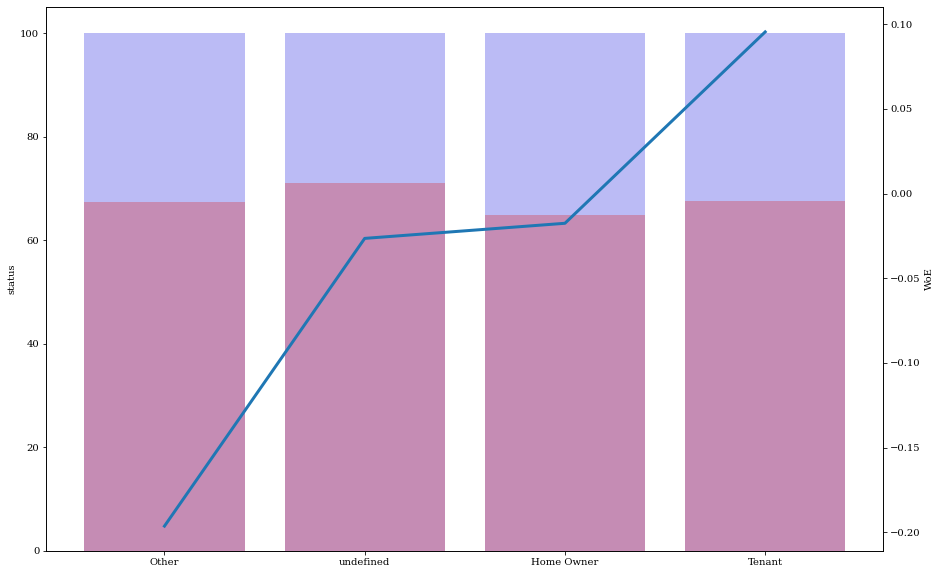

In [25]:
# Calculating the weight of evidence corresponing to each bucket.
df_ResStatus = woe_categorical(categorical, 'ResStatus', categorical['status'] , label_angel = 90)
df_ResStatus

In [26]:
WoEdata_categorical = WoEData(categorical, 'ResStatus', df_ResStatus[['ResStatus', 'WoE']])
WoEdata_categorical

,ResStatus,EmpStatus,OtherCC,status
0,-0.026469,Unknown,Yes,0
1,-0.017549,Employed,Yes,0
2,0.095463,Employed,No,0
3,-0.017549,Employed,Yes,0
4,-0.017549,Employed,Yes,0
...,...,...,...,...
1195,-0.017549,Unknown,Yes,0
1196,0.095463,Unknown,Yes,1
1197,-0.017549,Employed,Yes,1
1198,0.095463,Employed,Yes,0


In [27]:
# Linearly scaling the calculated weight of evidence.
dummy = df_ResStatus[['ResStatus', 'WoE']].sort_values(axis = 0, by = 'WoE' )
Scaled_WoE = lin_skaler(dummy, 0, 10)
Scaled_WoE

,Var_name,WoE,Scaled_WoE
0,ResStatus_Other,-0.196368,0.000000
1,ResStatus_undefined,-0.026469,5.821821
2,ResStatus_Home Owner,-0.017549,6.127473
3,ResStatus_Tenant,0.095463,10.000000


,EmpStatus,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,Employed,565,0.279646,0.470833,158.0,407.0,0.397985,0.506849,-0.241800,NaN,NaN
1,Unknown,635,0.376378,0.529167,239.0,396.0,0.602015,0.493151,0.199468,0.096732,0.441267


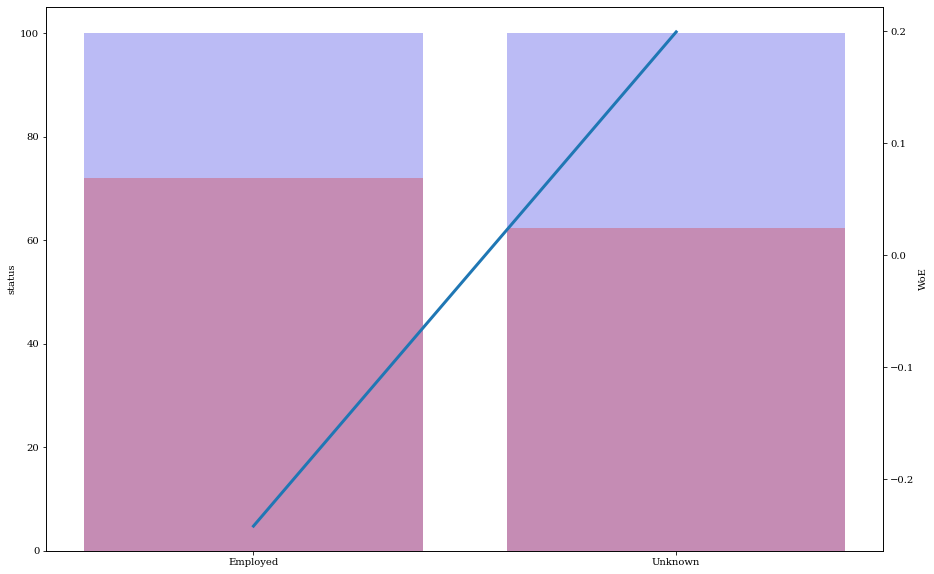

In [28]:
# First and optimal bucketing of EmpStatus.
df_EmpStatus = woe_categorical(categorical, 'EmpStatus', categorical['status'] , label_angel = 90)
df_EmpStatus

In [29]:
# Linearly scaling the calculated weight of evidence.
dummy = df_EmpStatus[['EmpStatus', 'WoE']].sort_values(axis = 0, by = 'WoE' )
Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler(dummy, 0, 10)], axis = 0)
Scaled_WoE

,Var_name,WoE,Scaled_WoE
0,ResStatus_Other,-0.196368,0.000000
1,ResStatus_undefined,-0.026469,5.821821
2,ResStatus_Home Owner,-0.017549,6.127473
3,ResStatus_Tenant,0.095463,10.000000
0,EmpStatus_Employed,-0.241800,0.000000
1,EmpStatus_Unknown,0.199468,10.000000


In [30]:
WoEdata_categorical = WoEData(WoEdata_categorical, 'EmpStatus', df_EmpStatus[['EmpStatus', 'WoE']])
WoEdata_categorical

,ResStatus,EmpStatus,OtherCC,status
0,-0.026469,0.199468,Yes,0
1,-0.017549,-0.2418,Yes,0
2,0.095463,-0.2418,No,0
3,-0.017549,-0.2418,Yes,0
4,-0.017549,-0.2418,Yes,0
...,...,...,...,...
1195,-0.017549,0.199468,Yes,0
1196,0.095463,0.199468,Yes,1
1197,-0.017549,-0.2418,Yes,1
1198,0.095463,-0.2418,Yes,0


,OtherCC,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,Yes,1009,0.319128,0.840833,322.0,687.0,0.811083,0.855542,-0.053364,NaN,NaN
1,No,191,0.392670,0.159167,75.0,116.0,0.188917,0.144458,0.268316,0.073542,0.321681


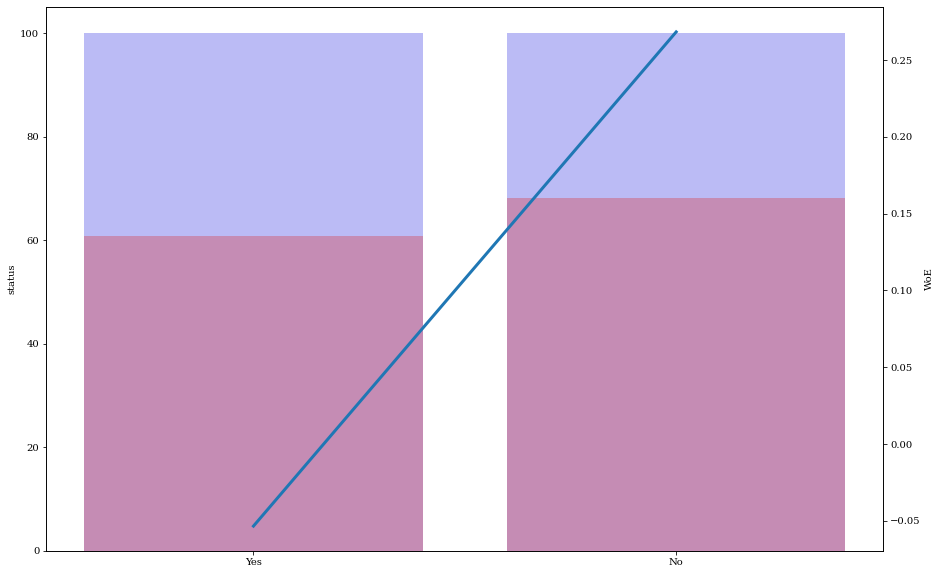

In [31]:
# First and optimal bucketing of OtherCC.
df_OtherCC = woe_categorical(categorical, 'OtherCC', categorical['status'] , label_angel = 90)
df_OtherCC

In [32]:
WoEdata_categorical = WoEData(WoEdata_categorical, 'OtherCC', df_OtherCC[['OtherCC', 'WoE']])
WoEdata_categorical

,ResStatus,EmpStatus,OtherCC,status
0,-0.026469,0.199468,-0.053364,0
1,-0.017549,-0.2418,-0.053364,0
2,0.095463,-0.2418,0.268316,0
3,-0.017549,-0.2418,-0.053364,0
4,-0.017549,-0.2418,-0.053364,0
...,...,...,...,...
1195,-0.017549,0.199468,-0.053364,0
1196,0.095463,0.199468,-0.053364,1
1197,-0.017549,-0.2418,-0.053364,1
1198,0.095463,-0.2418,-0.053364,0


In [33]:
# Linearly scaling the calculated weight of evidence.
dummy = df_OtherCC[['OtherCC', 'WoE']].sort_values(axis = 0, by = 'WoE')
Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler(dummy, 0, 10)], axis = 0)
Scaled_WoE

,Var_name,WoE,Scaled_WoE
0,ResStatus_Other,-0.196368,0.000000
1,ResStatus_undefined,-0.026469,5.821821
2,ResStatus_Home Owner,-0.017549,6.127473
3,ResStatus_Tenant,0.095463,10.000000
0,EmpStatus_Employed,-0.241800,0.000000
1,EmpStatus_Unknown,0.199468,10.000000
0,OtherCC_Yes,-0.053364,0.000000
1,OtherCC_No,0.268316,10.000000


### Numerical ferature treating 

In [34]:
# First bucketing "CustAge"  
optb = OptimalBinning(name = 'CustAge', dtype = "numerical", solver = "cp",)
optb.fit(numerical['CustAge'], numerical['status'])

OptimalBinning(name='CustAge')

In [35]:
# Calculated optimal bins and corresponding weigh of evidence and information values
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 34.50)",167,0.139167,92,75,0.449102,-0.500118,0.037182,0.004600
1,"[34.50, 39.50)",181,0.150833,112,69,0.381215,-0.220026,0.007553,0.000942
2,"[39.50, 44.50)",212,0.176667,137,75,0.353774,-0.101926,0.001866,0.000233
3,"[44.50, 46.50)",130,0.108333,86,44,0.338462,-0.034261,0.000128,0.000016
4,"[46.50, 48.50)",80,0.066667,57,23,0.287500,0.203139,0.002651,0.000331
5,"[48.50, 60.50)",359,0.299167,257,102,0.284123,0.219685,0.013867,0.001730
6,"[60.50, inf)",71,0.059167,62,9,0.126761,1.225491,0.066839,0.007868
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.130085,0.015720


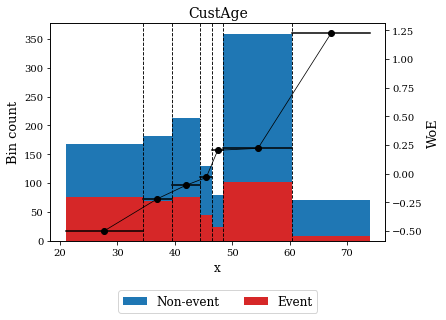

array([-inf, 34.5, 39.5, 44.5, 46.5, 48.5, 60.5,  inf])

In [36]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [37]:
# Linearly scaling the calculated weight of evidence.
x             = optb.binning_table.build()
x             = kategorizer_label(x)
dummy_custage = x[['Var_name', 'WoE']]
Scaled_WoE    = pd.concat([Scaled_WoE, lin_skaler_numerical(dummy_custage, 0, 10, \
                                                          'TmAtAddress')], axis = 0)
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)

,Var_name,WoE,Scaled_WoE
0,EmpStatus_Employed,-0.2418,0.000000
1,EmpStatus_Unknown,0.199468,10.000000
2,OtherCC_No,0.268316,10.000000
3,OtherCC_Yes,-0.053364,0.000000
4,ResStatus_Home Owner,-0.017549,6.127473
5,ResStatus_Other,-0.196368,0.000000
6,ResStatus_Tenant,0.095463,10.000000
7,ResStatus_undefined,-0.026469,5.821821
8,TmAtAddress_A,-0.500118,0.000000
9,TmAtAddress_B,-0.220026,1.623148


In [38]:
# Labeling each bucket elements with a symbol which makes it easier to convert for
# dummy variable forms to be used in the regression model.
Data               = kategorizer(numerical, 'CustAge', bins)
Data['CustAge']  = Data[['CustAge']].apply(lambda x: x.astype('object'))
Data

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,F,62,50000,55,1055.93,0.22,0
1,G,22,52000,25,1161.58,0.24,0
2,E,30,37000,61,877.23,0.29,0
3,D,75,53000,20,157.37,0.08,0
4,G,56,53000,14,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,F,92,41000,51,1230.98,0.35,0
1196,D,19,45000,4,239.28,0.13,1
1197,A,35,27000,47,16.18,0.01,1
1198,F,66,38000,48,1009.24,0.47,0


In [39]:
x                 = optb.binning_table.build()
x                 = kategorizer_label(x)
dummy_custage     = x[['Var_name', 'WoE']]
WoEdata_numerical = WoEData_numerical(Data, 'CustAge', dummy_custage[['Var_name', 'WoE']], 'Var_name')
WoEdata_numerical

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,0.219685,62,50000,55,1055.93,0.22,0
1,1.225491,22,52000,25,1161.58,0.24,0
2,0.203139,30,37000,61,877.23,0.29,0
3,-0.034261,75,53000,20,157.37,0.08,0
4,1.225491,56,53000,14,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,0.219685,92,41000,51,1230.98,0.35,0
1196,-0.034261,19,45000,4,239.28,0.13,1
1197,-0.500118,35,27000,47,16.18,0.01,1
1198,0.219685,66,38000,48,1009.24,0.47,0


In [40]:
# First bucketing "TmAtAddress" feature 
optb = OptimalBinning(name = 'TmAtAddress', dtype = "numerical", solver = "cp",)
optb.fit(numerical['TmAtAddress'], numerical['status'])

OptimalBinning(name='TmAtAddress')

In [41]:
# Calculated optimal bins and corresponding weigh of evidence and information values
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.50)",82,0.068333,51,31,0.378049,-0.20658,0.003011,3.756645e-04
1,"[6.50, 22.50)",286,0.238333,188,98,0.342657,-0.052944,0.000674,8.423287e-05
2,"[22.50, 27.50)",87,0.072500,64,23,0.264368,0.31897,0.006943,8.642027e-04
3,"[27.50, 31.50)",64,0.053333,54,10,0.156250,0.981981,0.041301,4.964713e-03
4,"[31.50, 63.50)",431,0.359167,288,143,0.331787,-0.004303,0.000007,8.317252e-07
5,"[63.50, inf)",250,0.208333,158,92,0.368000,-0.163612,0.005722,7.145126e-04
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,1200,1.000000,803,397,0.330833,,0.057658,7.004157e-03


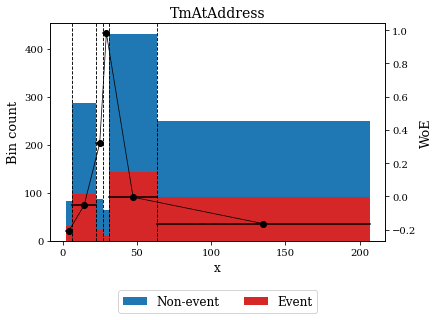

array([-inf,  6.5, 22.5, 27.5, 31.5, 63.5,  inf])

In [42]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [43]:
# As is shown in above cell, the calculated weight of evidence for those bins 
# betweeen [21.5, 27.5] are close to eachother so it makes a lot of scence to
# combine them. The new bin boundaries are listed in below.
user_splits =       [31.5,  63.5,]
user_splits_fixed = [False, False]

In [44]:
# Rebucketing with new bin boundaries to see if we will see a uniform trend or not
optb = OptimalBinning(name = 'TmAtAddress', dtype = "numerical", solver = "cp",
                      user_splits = user_splits, user_splits_fixed = user_splits_fixed)
optb.fit(numerical['TmAtAddress'], numerical['status'])

OptimalBinning(name='TmAtAddress', user_splits=[31.5, 63.5],
               user_splits_fixed=array([False, False]))

In [45]:
# Calculated optimal bins and corresponding weight of evidence after merging some bins
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 31.50)",519,0.432500,357,162,0.312139,0.085721,0.003131,3.912220e-04
1,"[31.50, 63.50)",431,0.359167,288,143,0.331787,-0.004303,0.000007,8.317252e-07
2,"[63.50, inf)",250,0.208333,158,92,0.368000,-0.163612,0.005722,7.145126e-04
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,1200,1.000000,803,397,0.330833,,0.008860,1.106566e-03


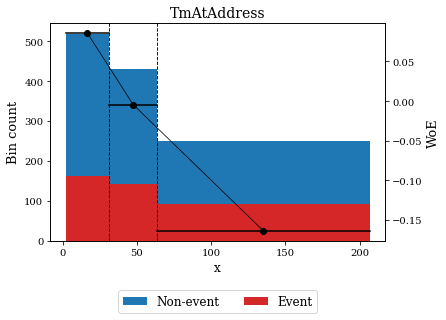

array([-inf, 31.5, 63.5,  inf])

In [46]:
# The calculated weight of evidence with the new bin boundaries show perfect uniformly decreasing trend.
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [47]:
# Linearly scaling the calculated weight of evidence.
x     = optb.binning_table.build()
x     = kategorizer_label(x)
dummy = x[['Var_name', 'WoE']].sort_values(axis = 0, by = 'WoE' )
Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler_numerical(dummy, 0, 10, 'TmAtAddress')], axis = 0)
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)

,Var_name,WoE,Scaled_WoE
0,EmpStatus_Employed,-0.2418,0.000000
1,EmpStatus_Unknown,0.199468,10.000000
2,OtherCC_No,0.268316,10.000000
3,OtherCC_Yes,-0.053364,0.000000
4,ResStatus_Home Owner,-0.017549,6.127473
5,ResStatus_Other,-0.196368,0.000000
6,ResStatus_Tenant,0.095463,10.000000
7,ResStatus_undefined,-0.026469,5.821821
8,TmAtAddress_A,-0.500118,0.000000
9,TmAtAddress_A,0.085721,10.000000


In [48]:
# Labeling each bucket elements with a symbol which makes it easier to convert for
# dummy variable forms to be used in the regression model.
Data                 = kategorizer(numerical, 'TmAtAddress', bins)
Data['TmAtAddress']  = Data[['TmAtAddress']].apply(lambda x: x.astype('object'))
Data

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,0.219685,B,50000,55,1055.93,0.22,0
1,1.225491,A,52000,25,1161.58,0.24,0
2,0.203139,A,37000,61,877.23,0.29,0
3,-0.034261,C,53000,20,157.37,0.08,0
4,1.225491,B,53000,14,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,0.219685,C,41000,51,1230.98,0.35,0
1196,-0.034261,A,45000,4,239.28,0.13,1
1197,-0.500118,B,27000,47,16.18,0.01,1
1198,0.219685,C,38000,48,1009.24,0.47,0


In [49]:
x                 = optb.binning_table.build()
x                 = kategorizer_label(x)
dummy_TmAtAddress = x[['Var_name', 'WoE']]
WoEdata_numerical = WoEData_numerical(Data, 'TmAtAddress', dummy_TmAtAddress[['Var_name', 'WoE']], 'Var_name')
WoEdata_numerical

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,0.219685,-0.004303,50000,55,1055.93,0.22,0
1,1.225491,0.085721,52000,25,1161.58,0.24,0
2,0.203139,0.085721,37000,61,877.23,0.29,0
3,-0.034261,-0.163612,53000,20,157.37,0.08,0
4,1.225491,-0.004303,53000,14,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,0.219685,-0.163612,41000,51,1230.98,0.35,0
1196,-0.034261,0.085721,45000,4,239.28,0.13,1
1197,-0.500118,-0.004303,27000,47,16.18,0.01,1
1198,0.219685,-0.163612,38000,48,1009.24,0.47,0


In [50]:
# First bucketing "CustIncome" feature 
optb = OptimalBinning(name = 'CustIncome', dtype = "numerical", solver = "cp",)
optb.fit(numerical['CustIncome'], numerical['status'])

OptimalBinning(name='CustIncome')

In [51]:
# Calculated optimal bins and corresponding weigh of evidence and information values
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 26500.00)",75,0.062500,34,41,0.546667,-0.89163,0.054330,0.006575
1,"[26500.00, 30500.00)",91,0.075833,48,43,0.472527,-0.594418,0.028851,0.003554
2,"[30500.00, 35500.00)",231,0.192500,152,79,0.341991,-0.049986,0.000485,0.000061
3,"[35500.00, 39500.00)",232,0.193333,154,78,0.336207,-0.024175,0.000113,0.000014
4,"[39500.00, 41500.00)",102,0.085000,68,34,0.333333,-0.011271,0.000011,0.000001
5,"[41500.00, 46500.00)",230,0.191667,164,66,0.286957,0.205793,0.007818,0.000975
6,"[46500.00, inf)",239,0.199167,183,56,0.234310,0.479716,0.041657,0.005158
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.133265,0.016338


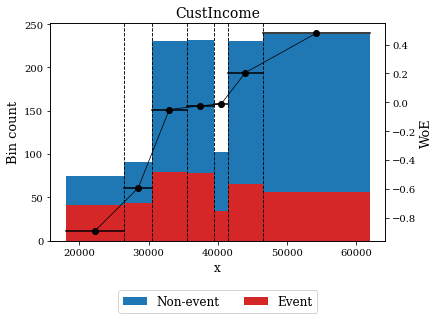

array([  -inf, 26500., 30500., 35500., 39500., 41500., 46500.,    inf])

In [52]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [53]:
# Linearly scaling the calculated weight of evidence.
x     = optb.binning_table.build()
x     = kategorizer_label(x)
dummy = x[['Var_name', 'WoE']].sort_values(axis = 0, by = 'WoE' )

Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler_numerical(dummy, 0, 10, 'CustIncome')], axis = 0)
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)

,Var_name,WoE,Scaled_WoE
0,CustIncome_A,-0.89163,0.000000
1,CustIncome_B,-0.594418,2.167305
2,CustIncome_C,-0.049986,6.137359
3,CustIncome_D,-0.024175,6.325576
4,CustIncome_E,-0.011271,6.419669
5,CustIncome_F,0.205793,8.002526
6,CustIncome_G,0.479716,10.000000
7,EmpStatus_Employed,-0.2418,0.000000
8,EmpStatus_Unknown,0.199468,10.000000
9,OtherCC_No,0.268316,10.000000


In [54]:
# Labeling each bucket elements with a symbol which makes it easier to convert for
# dummy variable forms to be used in the regression model.
Data                 = kategorizer(numerical, 'CustIncome', bins)
Data['CustIncome']  = Data[['CustIncome']].apply(lambda x: x.astype('object'))
Data

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,0.219685,-0.004303,G,55,1055.93,0.22,0
1,1.225491,0.085721,G,25,1161.58,0.24,0
2,0.203139,0.085721,D,61,877.23,0.29,0
3,-0.034261,-0.163612,G,20,157.37,0.08,0
4,1.225491,-0.004303,G,14,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,0.219685,-0.163612,E,51,1230.98,0.35,0
1196,-0.034261,0.085721,F,4,239.28,0.13,1
1197,-0.500118,-0.004303,B,47,16.18,0.01,1
1198,0.219685,-0.163612,D,48,1009.24,0.47,0


In [55]:
x                 = optb.binning_table.build()
x                 = kategorizer_label(x)
dummy_CustIncome  = x[['Var_name', 'WoE']]
WoEdata_numerical = WoEData_numerical(Data, 'CustIncome', dummy_CustIncome[['Var_name', 'WoE']], 'Var_name')
WoEdata_numerical

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,0.219685,-0.004303,0.479716,55,1055.93,0.22,0
1,1.225491,0.085721,0.479716,25,1161.58,0.24,0
2,0.203139,0.085721,-0.024175,61,877.23,0.29,0
3,-0.034261,-0.163612,0.479716,20,157.37,0.08,0
4,1.225491,-0.004303,0.479716,14,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,0.219685,-0.163612,-0.011271,51,1230.98,0.35,0
1196,-0.034261,0.085721,0.205793,4,239.28,0.13,1
1197,-0.500118,-0.004303,-0.594418,47,16.18,0.01,1
1198,0.219685,-0.163612,-0.024175,48,1009.24,0.47,0


In [56]:
# First bucketing "TmWBank" feature 
optb = OptimalBinning(name = 'TmWBank', dtype = "numerical", solver = "cp",)
optb.fit(numerical['TmWBank'], numerical['status'])

OptimalBinning(name='TmWBank')

In [57]:
# Calculated optimal bins and corresponding weigh of evidence and information values
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 14.50)",310,0.258333,197,113,0.364516,-0.148603,0.005841,0.000729
1,"[14.50, 28.50)",295,0.245833,184,111,0.376271,-0.199013,0.010041,0.001253
2,"[28.50, 32.50)",64,0.053333,34,30,0.468750,-0.579255,0.019246,0.002373
3,"[32.50, 44.50)",169,0.140833,115,54,0.319527,0.05153,0.000371,0.000046
4,"[44.50, 75.50)",267,0.222500,192,75,0.280899,0.235589,0.011823,0.001475
5,"[75.50, inf)",95,0.079167,81,14,0.147368,1.050973,0.068951,0.008243
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.116274,0.014119


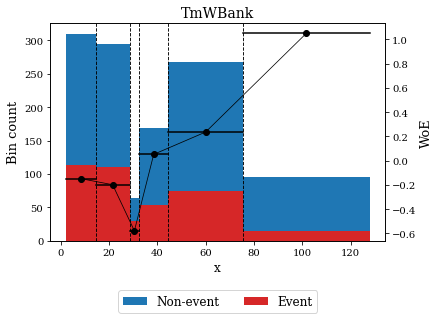

array([-inf, 14.5, 28.5, 32.5, 44.5, 75.5,  inf])

In [58]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [59]:
user_splits =       [28.5,  32.5,   44.5,  75.5,]
user_splits_fixed = [False, False,  False, False]

In [60]:
# Rebucketing with new bin boundaries to see if we will see a uniform trend or not
optb = OptimalBinning(name = 'TmWBank', dtype = "numerical", solver = "cp",
                      user_splits = user_splits, user_splits_fixed = user_splits_fixed)
optb.fit(numerical['TmWBank'], numerical['status'])

OptimalBinning(name='TmWBank', user_splits=[28.5, 32.5, 44.5, 75.5],
               user_splits_fixed=array([False, False, False, False]))

In [61]:
# Calculated optimal bins and corresponding weight of evidence after merging some bins
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 32.50)",669,0.557500,415,254,0.379671,-0.213474,0.026254,0.003276
1,"[32.50, 44.50)",169,0.140833,115,54,0.319527,0.05153,0.000371,0.000046
2,"[44.50, 75.50)",267,0.222500,192,75,0.280899,0.235589,0.011823,0.001475
3,"[75.50, inf)",95,0.079167,81,14,0.147368,1.050973,0.068951,0.008243
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.107400,0.013039


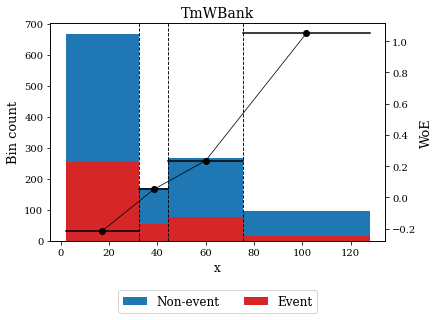

array([-inf, 32.5, 44.5, 75.5,  inf])

In [62]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [63]:
# Linearly scaling the calculated weight of evidence.
x     = optb.binning_table.build()
x     = kategorizer_label(x)
dummy = x[['Var_name', 'WoE']].sort_values(axis = 0, by = 'WoE' )

Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler_numerical(dummy, 0, 10, 'TmWBank')], axis = 0)
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)

,Var_name,WoE,Scaled_WoE
0,CustIncome_A,-0.89163,0.000000
1,CustIncome_B,-0.594418,2.167305
2,CustIncome_C,-0.049986,6.137359
3,CustIncome_D,-0.024175,6.325576
4,CustIncome_E,-0.011271,6.419669
5,CustIncome_F,0.205793,8.002526
6,CustIncome_G,0.479716,10.000000
7,EmpStatus_Employed,-0.2418,0.000000
8,EmpStatus_Unknown,0.199468,10.000000
9,OtherCC_No,0.268316,10.000000


In [64]:
# Labeling each bucket elements with a symbol which makes it easier to convert for
# dummy variable forms to be used in the regression model.
Data                 = kategorizer(numerical, 'TmWBank', bins)
Data['TmWBank']  = Data[['TmWBank']].apply(lambda x: x.astype('object'))
Data

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,0.219685,-0.004303,0.479716,C,1055.93,0.22,0
1,1.225491,0.085721,0.479716,A,1161.58,0.24,0
2,0.203139,0.085721,-0.024175,C,877.23,0.29,0
3,-0.034261,-0.163612,0.479716,A,157.37,0.08,0
4,1.225491,-0.004303,0.479716,A,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,0.219685,-0.163612,-0.011271,C,1230.98,0.35,0
1196,-0.034261,0.085721,0.205793,A,239.28,0.13,1
1197,-0.500118,-0.004303,-0.594418,C,16.18,0.01,1
1198,0.219685,-0.163612,-0.024175,C,1009.24,0.47,0


In [65]:
x                 = optb.binning_table.build()
x                 = kategorizer_label(x)
dummy_TmWBank     = x[['Var_name', 'WoE']]
WoEdata_numerical = WoEData_numerical(Data, 'TmWBank', dummy_TmWBank[['Var_name', 'WoE']], 'Var_name')
WoEdata_numerical

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,0.219685,-0.004303,0.479716,0.235589,1055.93,0.22,0
1,1.225491,0.085721,0.479716,-0.213474,1161.58,0.24,0
2,0.203139,0.085721,-0.024175,0.235589,877.23,0.29,0
3,-0.034261,-0.163612,0.479716,-0.213474,157.37,0.08,0
4,1.225491,-0.004303,0.479716,-0.213474,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,0.219685,-0.163612,-0.011271,0.235589,1230.98,0.35,0
1196,-0.034261,0.085721,0.205793,-0.213474,239.28,0.13,1
1197,-0.500118,-0.004303,-0.594418,0.235589,16.18,0.01,1
1198,0.219685,-0.163612,-0.024175,0.235589,1009.24,0.47,0


In [66]:
# First bucketing "AMBalance" feature 
optb = OptimalBinning(name = 'AMBalance', dtype = "numerical", solver = "cp",)
optb.fit(numerical['AMBalance'], numerical['status'])

OptimalBinning(name='AMBalance')

In [67]:
# Calculated optimal bins and corresponding weigh of evidence and information values
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 58.16)",60,0.050000,38,22,0.366667,-0.157875,0.001278,0.000160
1,"[58.16, 252.39)",172,0.143333,122,50,0.290698,0.18758,0.004874,0.000608
2,"[252.39, 417.03)",137,0.114167,98,39,0.284672,0.216987,0.005166,0.000644
3,"[417.03, 499.63)",64,0.053333,56,8,0.125000,1.241492,0.061562,0.007236
4,"[499.63, 587.53)",72,0.060000,54,18,0.250000,0.394194,0.008636,0.001073
5,"[587.53, 1669.65)",595,0.495833,379,216,0.363025,-0.142161,0.010250,0.001280
6,"[1669.65, inf)",100,0.083333,56,44,0.440000,-0.463256,0.019036,0.002359
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.110802,0.013360


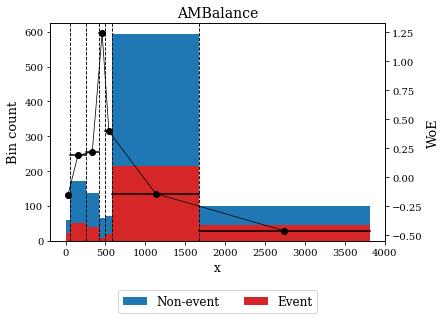

array([         -inf,   58.15999985,  252.39499664,  417.0349884 ,
        499.62998962,  587.52999878, 1669.65496826,           inf])

In [68]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [69]:
user_splits =       [499.62998962,  1669.65496826, ]
user_splits_fixed = [False,         False]

In [70]:
# Rebucketing with new bin boundaries to see if we will see a uniform trend or not
optb = OptimalBinning(name = 'AMBalance', dtype = "numerical", solver = "cp",
                      user_splits = user_splits, user_splits_fixed = user_splits_fixed)
optb.fit(numerical['AMBalance'], numerical['status'])

OptimalBinning(name='AMBalance', user_splits=[499.62998962, 1669.65496826],
               user_splits_fixed=array([False, False]))

In [71]:
# Calculated optimal bins and corresponding weight of evidence after merging some bins
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 499.63)",433,0.360833,314,119,0.274827,0.265851,0.024268,0.003025
1,"[499.63, 1669.65)",667,0.555833,433,234,0.350825,-0.089002,0.004467,0.000558
2,"[1669.65, inf)",100,0.083333,56,44,0.440000,-0.463256,0.019036,0.002359
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.047772,0.005941


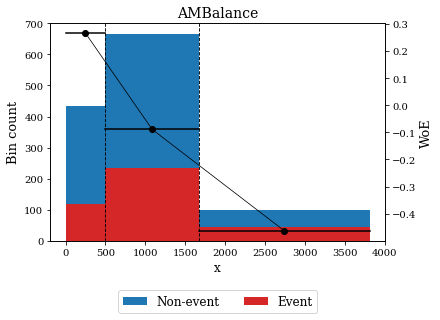

array([         -inf,  499.62998962, 1669.65496826,           inf])

In [72]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [73]:
# Linearly scaling the calculated weight of evidence.
x     = optb.binning_table.build()
x     = kategorizer_label(x)
dummy = x[['Var_name', 'WoE']].sort_values(axis = 0, by = 'WoE' )

Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler_numerical(dummy, 0, 10, 'AMBalance')], axis = 0)
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)

,Var_name,WoE,Scaled_WoE
0,AMBalance_A,0.265851,10.000000
1,AMBalance_B,-0.089002,5.133051
2,AMBalance_C,-0.463256,0.000000
3,CustIncome_A,-0.89163,0.000000
4,CustIncome_B,-0.594418,2.167305
5,CustIncome_C,-0.049986,6.137359
6,CustIncome_D,-0.024175,6.325576
7,CustIncome_E,-0.011271,6.419669
8,CustIncome_F,0.205793,8.002526
9,CustIncome_G,0.479716,10.000000


In [74]:
# Labeling each bucket elements with a symbol which makes it easier to convert for
# dummy variable forms to be used in the regression model.
Data                 = kategorizer(numerical, 'AMBalance', bins)
Data['AMBalance']  = Data[['AMBalance']].apply(lambda x: x.astype('object'))
Data

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,0.219685,-0.004303,0.479716,0.235589,B,0.22,0
1,1.225491,0.085721,0.479716,-0.213474,B,0.24,0
2,0.203139,0.085721,-0.024175,0.235589,B,0.29,0
3,-0.034261,-0.163612,0.479716,-0.213474,A,0.08,0
4,1.225491,-0.004303,0.479716,-0.213474,B,0.11,0
...,...,...,...,...,...,...,...
1195,0.219685,-0.163612,-0.011271,0.235589,B,0.35,0
1196,-0.034261,0.085721,0.205793,-0.213474,A,0.13,1
1197,-0.500118,-0.004303,-0.594418,0.235589,A,0.01,1
1198,0.219685,-0.163612,-0.024175,0.235589,B,0.47,0


In [75]:
x                 = optb.binning_table.build()
x                 = kategorizer_label(x)
dummy_AMBalance   = x[['Var_name', 'WoE']]
WoEdata_numerical = WoEData_numerical(Data, 'AMBalance', dummy_AMBalance[['Var_name', 'WoE']], 'Var_name')
WoEdata_numerical

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,0.219685,-0.004303,0.479716,0.235589,-0.089002,0.22,0
1,1.225491,0.085721,0.479716,-0.213474,-0.089002,0.24,0
2,0.203139,0.085721,-0.024175,0.235589,-0.089002,0.29,0
3,-0.034261,-0.163612,0.479716,-0.213474,0.265851,0.08,0
4,1.225491,-0.004303,0.479716,-0.213474,-0.089002,0.11,0
...,...,...,...,...,...,...,...
1195,0.219685,-0.163612,-0.011271,0.235589,-0.089002,0.35,0
1196,-0.034261,0.085721,0.205793,-0.213474,0.265851,0.13,1
1197,-0.500118,-0.004303,-0.594418,0.235589,0.265851,0.01,1
1198,0.219685,-0.163612,-0.024175,0.235589,-0.089002,0.47,0


In [76]:
# First bucketing "UtilRate" feature 
optb = OptimalBinning(name = 'UtilRate', dtype = "numerical", solver = "cp",)
optb.fit(numerical['UtilRate'], numerical['status'])

OptimalBinning(name='UtilRate')

In [77]:
# Calculated optimal bins and corresponding weight of evidence after merging some bins
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.05)",340,0.283333,224,116,0.341176,-0.046363,0.000614,0.000077
1,"[0.05, 0.30)",546,0.455000,374,172,0.315018,0.072343,0.002351,0.000294
2,"[0.30, 0.38)",94,0.078333,73,21,0.223404,0.541519,0.020584,0.002542
3,"[0.38, inf)",220,0.183333,132,88,0.400000,-0.298953,0.017124,0.002133
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.040673,0.005045


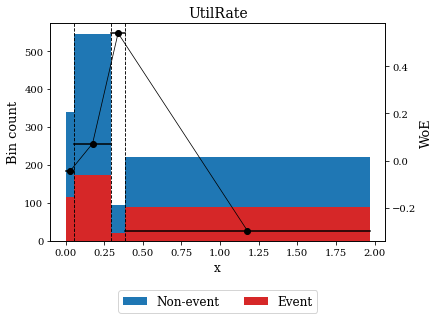

array([      -inf, 0.055     , 0.295     , 0.38499999,        inf])

In [78]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [79]:
user_splits =       [0.38499999, ]
user_splits_fixed = [False]

In [80]:
# Rebucketing with new bin boundaries to see if we will see a uniform trend or not
optb = OptimalBinning(name = 'UtilRate', dtype = "numerical", solver = "cp",
                      user_splits = user_splits, user_splits_fixed = user_splits_fixed)
optb.fit(numerical['UtilRate'], numerical['status'])

OptimalBinning(name='UtilRate', user_splits=[0.38499999],
               user_splits_fixed=array([False]))

In [81]:
# Calculated optimal bins and corresponding weight of evidence after merging some bins
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.38)",980,0.816667,671,309,0.315306,0.071009,0.004067,0.000508
1,"[0.38, inf)",220,0.183333,132,88,0.400000,-0.298953,0.017124,0.002133
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.021191,0.002641


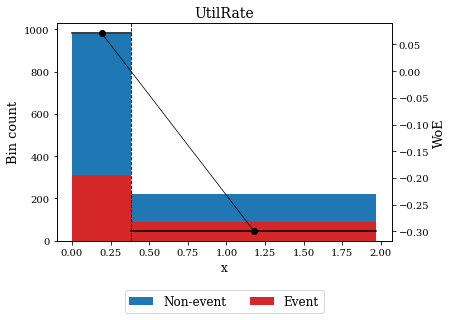

array([      -inf, 0.38499999,        inf])

In [82]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [83]:
# Linearly scaling the calculated weight of evidence.
x     = optb.binning_table.build()
x     = kategorizer_label(x)
dummy = x[['Var_name', 'WoE']].sort_values(axis = 0, by = 'WoE' )

Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler_numerical(dummy, 0, 10, 'UtilRate')], axis = 0)
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)

,Var_name,WoE,Scaled_WoE
0,AMBalance_A,0.265851,10.000000
1,AMBalance_B,-0.089002,5.133051
2,AMBalance_C,-0.463256,0.000000
3,CustIncome_A,-0.89163,0.000000
4,CustIncome_B,-0.594418,2.167305
5,CustIncome_C,-0.049986,6.137359
6,CustIncome_D,-0.024175,6.325576
7,CustIncome_E,-0.011271,6.419669
8,CustIncome_F,0.205793,8.002526
9,CustIncome_G,0.479716,10.000000


In [84]:
# Labeling each bucket elements with a symbol which makes it easier to convert for
# dummy variable forms to be used in the regression model.
Data                 = kategorizer(numerical, 'UtilRate', bins)
Data['UtilRate']  = Data[['UtilRate']].apply(lambda x: x.astype('object'))
Data

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,0.219685,-0.004303,0.479716,0.235589,-0.089002,A,0
1,1.225491,0.085721,0.479716,-0.213474,-0.089002,A,0
2,0.203139,0.085721,-0.024175,0.235589,-0.089002,A,0
3,-0.034261,-0.163612,0.479716,-0.213474,0.265851,A,0
4,1.225491,-0.004303,0.479716,-0.213474,-0.089002,A,0
...,...,...,...,...,...,...,...
1195,0.219685,-0.163612,-0.011271,0.235589,-0.089002,A,0
1196,-0.034261,0.085721,0.205793,-0.213474,0.265851,A,1
1197,-0.500118,-0.004303,-0.594418,0.235589,0.265851,A,1
1198,0.219685,-0.163612,-0.024175,0.235589,-0.089002,B,0


In [85]:
x                 = optb.binning_table.build()
x                 = kategorizer_label(x)
dummy_UtilRate    = x[['Var_name', 'WoE']]
WoEdata_numerical = WoEData_numerical(Data, 'UtilRate', dummy_UtilRate[['Var_name', 'WoE']], 'Var_name')
WoEdata_numerical

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,0.219685,-0.004303,0.479716,0.235589,-0.089002,0.071009,0
1,1.225491,0.085721,0.479716,-0.213474,-0.089002,0.071009,0
2,0.203139,0.085721,-0.024175,0.235589,-0.089002,0.071009,0
3,-0.034261,-0.163612,0.479716,-0.213474,0.265851,0.071009,0
4,1.225491,-0.004303,0.479716,-0.213474,-0.089002,0.071009,0
...,...,...,...,...,...,...,...
1195,0.219685,-0.163612,-0.011271,0.235589,-0.089002,0.071009,0
1196,-0.034261,0.085721,0.205793,-0.213474,0.265851,0.071009,1
1197,-0.500118,-0.004303,-0.594418,0.235589,0.265851,0.071009,1
1198,0.219685,-0.163612,-0.024175,0.235589,-0.089002,-0.298953,0


## Combining trated categorical and numerical predictors

In [86]:
processed_data = pd.concat([WoEdata_categorical, WoEdata_numerical], axis = 1)
processed_data

,ResStatus,EmpStatus,OtherCC,status,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,-0.026469,0.199468,-0.053364,0,0.219685,-0.004303,0.479716,0.235589,-0.089002,0.071009,0
1,-0.017549,-0.2418,-0.053364,0,1.225491,0.085721,0.479716,-0.213474,-0.089002,0.071009,0
2,0.095463,-0.2418,0.268316,0,0.203139,0.085721,-0.024175,0.235589,-0.089002,0.071009,0
3,-0.017549,-0.2418,-0.053364,0,-0.034261,-0.163612,0.479716,-0.213474,0.265851,0.071009,0
4,-0.017549,-0.2418,-0.053364,0,1.225491,-0.004303,0.479716,-0.213474,-0.089002,0.071009,0
...,...,...,...,...,...,...,...,...,...,...,...
1195,-0.017549,0.199468,-0.053364,0,0.219685,-0.163612,-0.011271,0.235589,-0.089002,0.071009,0
1196,0.095463,0.199468,-0.053364,1,-0.034261,0.085721,0.205793,-0.213474,0.265851,0.071009,1
1197,-0.017549,-0.2418,-0.053364,1,-0.500118,-0.004303,-0.594418,0.235589,0.265851,0.071009,1
1198,0.095463,-0.2418,-0.053364,0,0.219685,-0.163612,-0.024175,0.235589,-0.089002,-0.298953,0


In [87]:
# List of final selected features to be incorporated into final model
features_list = ['ResStatus', 'EmpStatus', 'OtherCC',  'CustAge', 'TmAtAddress',\
                  'CustIncome','TmWBank',   'AMBalance','UtilRate',]

df_log = Data[['status',]]

for col in features_list:
     dummies = pd.get_dummies(processed_data[[col]], drop_first = False)
     processed_data[[col]] = processed_data[[col]].apply(lambda x: x.astype('float64'))
     df_log  = pd.concat([df_log, processed_data[[col]]], axis = 1)

df_log.head()

,status,ResStatus,EmpStatus,OtherCC,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate
0,0,-0.026469,0.199468,-0.053364,0.219685,-0.004303,0.479716,0.235589,-0.089002,0.071009
1,0,-0.017549,-0.241800,-0.053364,1.225491,0.085721,0.479716,-0.213474,-0.089002,0.071009
2,0,0.095463,-0.241800,0.268316,0.203139,0.085721,-0.024175,0.235589,-0.089002,0.071009
3,0,-0.017549,-0.241800,-0.053364,-0.034261,-0.163612,0.479716,-0.213474,0.265851,0.071009
4,0,-0.017549,-0.241800,-0.053364,1.225491,-0.004303,0.479716,-0.213474,-0.089002,0.071009


In [88]:
# # Cheking the corrolation between predictors
# fig , ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = ((15,10)))
# sns.heatmap(processed_data.corr().abs() > 0.5 ,cmap = "YlGnBu", annot = True,)

## Multifactor analysis

In [89]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                           initial_list  = [], 
                           threshold_in  = 0.05, 
                           threshold_out = 0.05, 
                           verbose       = True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6f}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6f}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [90]:
selected_features = df_log.columns.tolist()
X                 = df_log[selected_features].drop('status', axis = 1)
Y                 = df_log.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

print(X_train.shape,Y_train.shape)
print(X_test.shape,  Y_test.shape)
X_train

(960, 9) (960,)
(240, 9) (240,)


,ResStatus,EmpStatus,OtherCC,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate
819,-0.017549,-0.241800,-0.053364,-0.101926,-0.163612,-0.049986,0.235589,-0.089002,0.071009
830,-0.026469,0.199468,-0.053364,0.219685,-0.004303,0.479716,-0.213474,0.265851,0.071009
963,0.095463,-0.241800,-0.053364,-0.220026,-0.004303,-0.594418,-0.213474,0.265851,0.071009
128,-0.017549,-0.241800,-0.053364,0.219685,-0.163612,-0.024175,-0.213474,-0.089002,0.071009
560,0.095463,-0.241800,-0.053364,-0.220026,-0.004303,-0.011271,-0.213474,-0.089002,0.071009
...,...,...,...,...,...,...,...,...,...
461,-0.196368,0.199468,-0.053364,1.225491,-0.163612,0.479716,0.235589,-0.089002,0.071009
1187,0.095463,-0.241800,-0.053364,-0.220026,-0.004303,-0.024175,-0.213474,-0.089002,0.071009
1173,0.095463,0.199468,-0.053364,-0.034261,0.085721,0.479716,-0.213474,0.265851,0.071009
373,0.095463,-0.241800,-0.053364,0.219685,0.085721,0.205793,0.235589,0.265851,0.071009


In [91]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
        
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [92]:
#Listing the survived predictors as a function of p-value
result = stepwise_selection(X_train, Y_train,initial_list=[], 
                                        threshold_in  = 0.05, 
                                        threshold_out = 0.10, 
                                              verbose = True)

print('resulting features:')
print(result)

Add  CustIncome                     with p-value 0.000000
Add  TmWBank                        with p-value 0.000001
Add  AMBalance                      with p-value 0.000809
Add  EmpStatus                      with p-value 0.002095
Add  CustAge                        with p-value 0.023299
resulting features:
['CustIncome', 'TmWBank', 'AMBalance', 'EmpStatus', 'CustAge']


In [93]:
multi_factor_features_list = ['CustAge', 'TmWBank', 'EmpStatus', 'AMBalance', 'CustIncome', 'OtherCC']

# Since, the given dataset is imbalanced, oversampling will increase the performance of the model.
X    = df_log[multi_factor_features_list]
Y    = df_log.iloc[:,0]
sm   = SMOTE(random_state = 101)
X, Y = sm.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101 )

print(X_train.shape,Y_train.shape)
print(X_test.shape,  Y_test.shape)
X_test.head()

(1124, 6) (1124,)
(482, 6) (482,)


,CustAge,TmWBank,EmpStatus,AMBalance,CustIncome,OtherCC
104,-0.500118,1.050973,-0.241800,-0.089002,-0.049986,-0.053364
524,-0.101926,-0.213474,0.199468,-0.089002,-0.594418,-0.053364
1564,-0.500118,-0.213474,0.199468,-0.089002,-0.891630,-0.053364
1463,-0.500118,0.235589,0.199468,0.038890,-0.891630,0.062572
749,-0.101926,-0.213474,-0.241800,-0.463256,-0.024175,-0.053364


In [94]:
# Defining the logistic regression as model
model        = LogisticRegression() # another alternative would be "reg = LogisticRegression_with_p_values()""
model.fit(X_train, Y_train)
feature_name = X_train.columns.values

In [95]:
# Make summary table and print it, accordingly.
summary_table                 = pd.DataFrame(columns = ['Var_name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(model.coef_)
summary_table.index           = summary_table.index + 1
summary_table.loc[0]          = ['Intercept', model.intercept_[0]]
summary_table                 = summary_table.sort_index()
m, n                          = summary_table.shape
summary_table

,Var_name,Coefficients
0,Intercept,0.082830
1,CustAge,-0.616290
2,TmWBank,-1.029505
3,EmpStatus,0.539042
4,AMBalance,-0.697217
5,CustIncome,-0.681279
6,OtherCC,0.253405


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.682


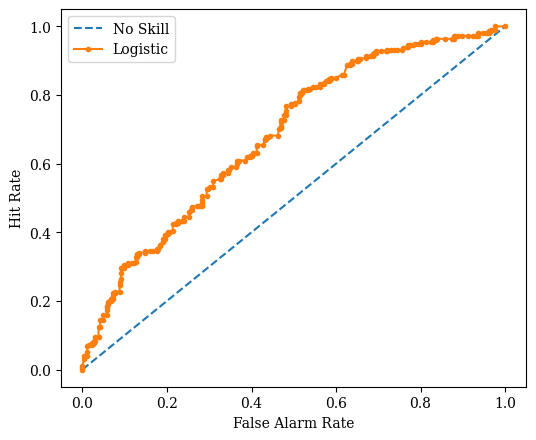

In [96]:
f, (ax_hist) = plt.subplots(figsize = (6, 5), dpi = 100)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]
# # fit a model
result   = model.fit(X_train, Y_train)

# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle ='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker    ='.' , label='Logistic')
# axis labels
plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [97]:
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)
Scaled_WoE[['Var_name_orig', 'Var_name_pref']] = Scaled_WoE['Var_name'].str.split('_', 1, expand=True)
Scaled_WoE = Scaled_WoE.reset_index( drop = True)
Scaled_WoE

,Var_name,WoE,Scaled_WoE,Var_name_orig,Var_name_pref
0,ResStatus_Other,-0.196368,0.000000,ResStatus,Other
1,ResStatus_undefined,-0.026469,5.821821,ResStatus,undefined
2,ResStatus_Home Owner,-0.017549,6.127473,ResStatus,Home Owner
3,ResStatus_Tenant,0.095463,10.000000,ResStatus,Tenant
4,EmpStatus_Employed,-0.2418,0.000000,EmpStatus,Employed
5,EmpStatus_Unknown,0.199468,10.000000,EmpStatus,Unknown
6,OtherCC_Yes,-0.053364,0.000000,OtherCC,Yes
7,OtherCC_No,0.268316,10.000000,OtherCC,No
8,TmAtAddress_A,-0.500118,0.000000,TmAtAddress,A
9,TmAtAddress_B,-0.220026,1.623148,TmAtAddress,B


In [98]:
Scaled_WoE['Coefficient'] = 0*Scaled_WoE['WoE']


for element in multi_factor_features_list:
    m,n = Scaled_WoE.shape
    #print(element)
    for i in range(m):
        if (element == Scaled_WoE['Var_name_orig'][i]):
            #print(element, Scaled_WoE['Var_name_orig'][i],)
            Scaled_WoE['Coefficient'][i] = np.array(summary_table[summary_table['Var_name'] ==\
                                                                 'CustAge']['Coefficients'])[0]
Scaled_WoE.loc[0] = ['Intercept',1, 1, 'Intercept', 'Intercept', summary_table.iloc[0][1],]            
Scaled_WoE['Points'] = (Scaled_WoE['WoE']*Scaled_WoE['Coefficient'])
Scaled_WoE

,Var_name,WoE,Scaled_WoE,Var_name_orig,Var_name_pref,Coefficient,Points
0,Intercept,1,1.000000,Intercept,Intercept,0.08283,0.08283
1,ResStatus_undefined,-0.026469,5.821821,ResStatus,undefined,-0.0,0.0
2,ResStatus_Home Owner,-0.017549,6.127473,ResStatus,Home Owner,-0.0,0.0
3,ResStatus_Tenant,0.095463,10.000000,ResStatus,Tenant,0.0,0.0
4,EmpStatus_Employed,-0.2418,0.000000,EmpStatus,Employed,-0.61629,0.149019
5,EmpStatus_Unknown,0.199468,10.000000,EmpStatus,Unknown,-0.61629,-0.12293
6,OtherCC_Yes,-0.053364,0.000000,OtherCC,Yes,-0.61629,0.032888
7,OtherCC_No,0.268316,10.000000,OtherCC,No,-0.61629,-0.165361
8,TmAtAddress_A,-0.500118,0.000000,TmAtAddress,A,-0.0,0.0
9,TmAtAddress_B,-0.220026,1.623148,TmAtAddress,B,-0.0,0.0


In [99]:
X                 = df_log.drop('status', axis = 1)
Y                 = df_log.iloc[:,0]
X

,ResStatus,EmpStatus,OtherCC,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate
0,-0.026469,0.199468,-0.053364,0.219685,-0.004303,0.479716,0.235589,-0.089002,0.071009
1,-0.017549,-0.241800,-0.053364,1.225491,0.085721,0.479716,-0.213474,-0.089002,0.071009
2,0.095463,-0.241800,0.268316,0.203139,0.085721,-0.024175,0.235589,-0.089002,0.071009
3,-0.017549,-0.241800,-0.053364,-0.034261,-0.163612,0.479716,-0.213474,0.265851,0.071009
4,-0.017549,-0.241800,-0.053364,1.225491,-0.004303,0.479716,-0.213474,-0.089002,0.071009
...,...,...,...,...,...,...,...,...,...
1195,-0.017549,0.199468,-0.053364,0.219685,-0.163612,-0.011271,0.235589,-0.089002,0.071009
1196,0.095463,0.199468,-0.053364,-0.034261,0.085721,0.205793,-0.213474,0.265851,0.071009
1197,-0.017549,-0.241800,-0.053364,-0.500118,-0.004303,-0.594418,0.235589,0.265851,0.071009
1198,0.095463,-0.241800,-0.053364,0.219685,-0.163612,-0.024175,0.235589,-0.089002,-0.298953


In [100]:
# Clculation of the score as a function of scaled weight of evidence
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for element in X.columns:
    le.fit(X[element])
    X[element] = le.transform(X[element])
X = pd.get_dummies(X, drop_first = False)
X

,ResStatus,EmpStatus,OtherCC,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate
0,1,1,0,5,1,6,2,1,1
1,2,0,0,6,2,6,0,1,1
2,3,0,1,4,2,3,2,1,1
3,2,0,0,3,0,6,0,2,1
4,2,0,0,6,1,6,0,1,1
...,...,...,...,...,...,...,...,...,...
1195,2,1,0,5,0,4,2,1,1
1196,3,1,0,3,2,5,0,2,1
1197,2,0,0,0,1,1,2,2,1
1198,3,0,0,5,0,3,2,1,0


In [101]:
# List of final selected features to be incorporated into final model
features_list = ['ResStatus', 'EmpStatus', 'OtherCC',  'CustAge', 'TmAtAddress',\
                 'CustIncome','TmWBank',   'AMBalance','UtilRate',]

data_dummies = pd.DataFrame()

for col in features_list:
    #print(col)
    dummies = pd.get_dummies(X[[col]], drop_first = False)
    data_dummies  = pd.concat([data_dummies, dummies], axis = 1)
Xp = pd.DataFrame()

for col in data_dummies.columns:
    #print(col)
    dummies = pd.get_dummies(X[col], prefix = col, drop_first = False)
    Xp  = pd.concat([Xp, dummies], axis = 1)
m, n = Xp.shape
Xp.insert(0, 'Intercept', np.ones((m,1)))    
Xp.head()

,Intercept,ResStatus_0,ResStatus_1,ResStatus_2,ResStatus_3,EmpStatus_0,EmpStatus_1,OtherCC_0,OtherCC_1,CustAge_0,CustAge_1,CustAge_2,CustAge_3,CustAge_4,CustAge_5,CustAge_6,TmAtAddress_0,TmAtAddress_1,TmAtAddress_2,CustIncome_0,CustIncome_1,CustIncome_2,CustIncome_3,CustIncome_4,CustIncome_5,CustIncome_6,TmWBank_0,TmWBank_1,TmWBank_2,TmWBank_3,AMBalance_0,AMBalance_1,AMBalance_2,UtilRate_0,UtilRate_1
0,1.0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
1,1.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
2,1.0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
3,1.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1
4,1.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1


In [102]:
m,n = Scaled_WoE.shape
Xp['score'] = 0*Xp['Intercept']
for i in range(m):
    Xp['score'][i] = np.sum(pd.Series(Xp.iloc[:,i])*Scaled_WoE['Points'])*28.85 - 12.87
Xp.head()

,Intercept,ResStatus_0,ResStatus_1,ResStatus_2,ResStatus_3,EmpStatus_0,EmpStatus_1,OtherCC_0,OtherCC_1,CustAge_0,CustAge_1,CustAge_2,CustAge_3,CustAge_4,CustAge_5,CustAge_6,TmAtAddress_0,TmAtAddress_1,TmAtAddress_2,CustIncome_0,CustIncome_1,CustIncome_2,CustIncome_3,CustIncome_4,CustIncome_5,CustIncome_6,TmWBank_0,TmWBank_1,TmWBank_2,TmWBank_3,AMBalance_0,AMBalance_1,AMBalance_2,UtilRate_0,UtilRate_1,score
0,1.0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,-12.700373
1,1.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,-16.317060
2,1.0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,-10.050529
3,1.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,-6.158159
4,1.0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,-18.784626


In [103]:
# Linear transformation of the calculated score to set it in the interval [c, d].
def lin_skaler_numerical_1(data, c, d):
    a               =  np.min(data['score'])
    b               =  np.max(data['score'])
    data['Score'] = data['score'].apply(lambda x: c + ((d-c)/(b-a))*(x - a))
    return data    

In [104]:
Xp = lin_skaler_numerical_1(Xp, 0, 100)
Xp['Prob'] = pd.Series( model.predict_proba(df_log[multi_factor_features_list])[:,0])
Xp['Odd'] = Xp['Prob']/(1 - Xp['Prob'])
Xp = Xp.sort_values(by = 'Score')
#Xp

In [105]:
data[['Score', 'Prob']] = Xp[['Score', 'Prob']]
data = data.sort_values(by = 'Score')
data

,CustAge,TmAtAddress,ResStatus,EmpStatus,CustIncome,TmWBank,OtherCC,AMBalance,UtilRate,status,Score,Prob
8,50.0,10,Tenant,Unknown,52000,25,Yes,115.56,0.02,1,0.000000,0.562414
6,34.0,32,Home Owner,Unknown,32000,26,Yes,717.82,0.02,1,11.206839,0.309827
14,46.0,82,Other,Employed,46000,16,Yes,162.21,0.04,0,16.643825,0.536362
27,40.0,64,Home Owner,Unknown,31000,10,Yes,504.08,0.10,0,24.176908,0.364583
32,46.0,8,<undefined>,Unknown,32000,26,Yes,940.78,0.30,0,29.783508,0.374298
...,...,...,...,...,...,...,...,...,...,...,...,...
423,32.0,62,Other,Employed,31000,21,Yes,647.31,0.02,0,75.953039,0.362838
1199,44.0,24,Tenant,Unknown,41000,16,Yes,1039.40,0.19,0,75.953039,0.370715
5,65.0,13,Home Owner,Employed,48000,59,Yes,968.18,0.15,0,85.895427,0.789780
7,50.0,57,Other,Employed,51000,33,No,3041.20,0.13,0,97.102267,0.542841
